In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline


<Figure size 3750x2000 with 0 Axes>

In [2]:
ff = pd.read_csv('/content/forestfires.csv')

In [3]:
ff

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [4]:
ff_nrow = ff.shape[0]

In [5]:
def lost_record():

  ff_nrow_now = ff.shape[0]
  lost = ff_nrow - ff_nrow_now
  lost = (lost/ff_nrow)*100
  lost = round(lost,2)

  return print('We Lost '+ str(lost) + ' % data')

# Performing EDA In Dataset
Applying Descriptive Statistics

In [6]:
ff.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [7]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
ff.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))

In [10]:
uni(ff)


 All Unique Value in month
['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
Total no of unique values 12

 All Unique Value in day
['fri' 'mon' 'sat' 'sun' 'thu' 'tue' 'wed']
Total no of unique values 7

 All Unique Value in FFMC
[18.7 50.4 53.4 63.5 68.2 69.  75.1 79.5 81.5 81.6 81.9 82.1 83.  83.9
 84.  84.1 84.2 84.4 84.6 84.7 84.9 85.  85.1 85.2 85.4 85.6 85.8 85.9
 86.2 86.3 86.6 86.8 86.9 87.1 87.2 87.5 87.6 87.9 88.  88.1 88.2 88.3
 88.6 88.8 88.9 89.2 89.3 89.4 89.6 89.7 90.  90.1 90.2 90.3 90.4 90.5
 90.6 90.7 90.8 90.9 91.  91.1 91.2 91.3 91.4 91.5 91.6 91.7 91.8 91.9
 92.  92.1 92.2 92.3 92.4 92.5 92.6 92.7 92.8 92.9 93.  93.1 93.2 93.3
 93.4 93.5 93.6 93.7 93.9 94.  94.2 94.3 94.4 94.5 94.6 94.8 94.9 95.
 95.1 95.2 95.5 95.8 95.9 96.  96.1 96.2]
Total no of unique values 106

 All Unique Value in DMC
[  1.1   2.4   3.    3.2   3.6   3.7   4.4   4.6   4.9   6.6   6.8   7.3
   8.    8.2   8.7   9.    9.1   9.3   9.5  13.2  14.6  15.   15.1  15.6
  17

# Checking for Duplicated Values

In [11]:
ff[ff.duplicated()]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0  ...         0   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0  ...         0   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  ...         0   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...         0   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0  ...         0   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0  ...         0   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8  ...         0   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         1         0         0         0   
303         0         0         1         0         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthsep  size_category  
53          0          small  
100         0          small  
215         0          large  
303         0          small  
426         0          small  
461         0          small  
501         0          small  
508         0          small  

[8 rows x 31 columns]

In [12]:
ff.drop_duplicates(inplace = True)

In [16]:
ff.drop_duplicates(inplace = True)

In [17]:
ff[ff.duplicated()]

Empty DataFrame
Columns: [month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area, dayfri, daymon, daysat, daysun, daythu, daytue, daywed, monthapr, monthaug, monthdec, monthfeb, monthjan, monthjul, monthjun, monthmar, monthmay, monthnov, monthoct, monthsep, size_category]
Index: []

[0 rows x 31 columns]

There is no duplicate vale in are dataset
# Reseting Index

In [18]:
ff.reset_index(inplace=True)
ff.drop(columns='index',inplace=True)

ff

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
504   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
505   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
506   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
507   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
508   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
504         0         0         0         0         0         0         0   
505         0         0         0         0         0         0         0   
506         0         0         0         0         0         0         0   
507         0         0         0         0         0         0         0   
508         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
504         0          large  
505         0          large  
506         0          large  
507         0          small  
508         0          small  

[509 rows x 31 columns]

# Visualizing The Data
**Ploting Boxplot**

<Axes: >

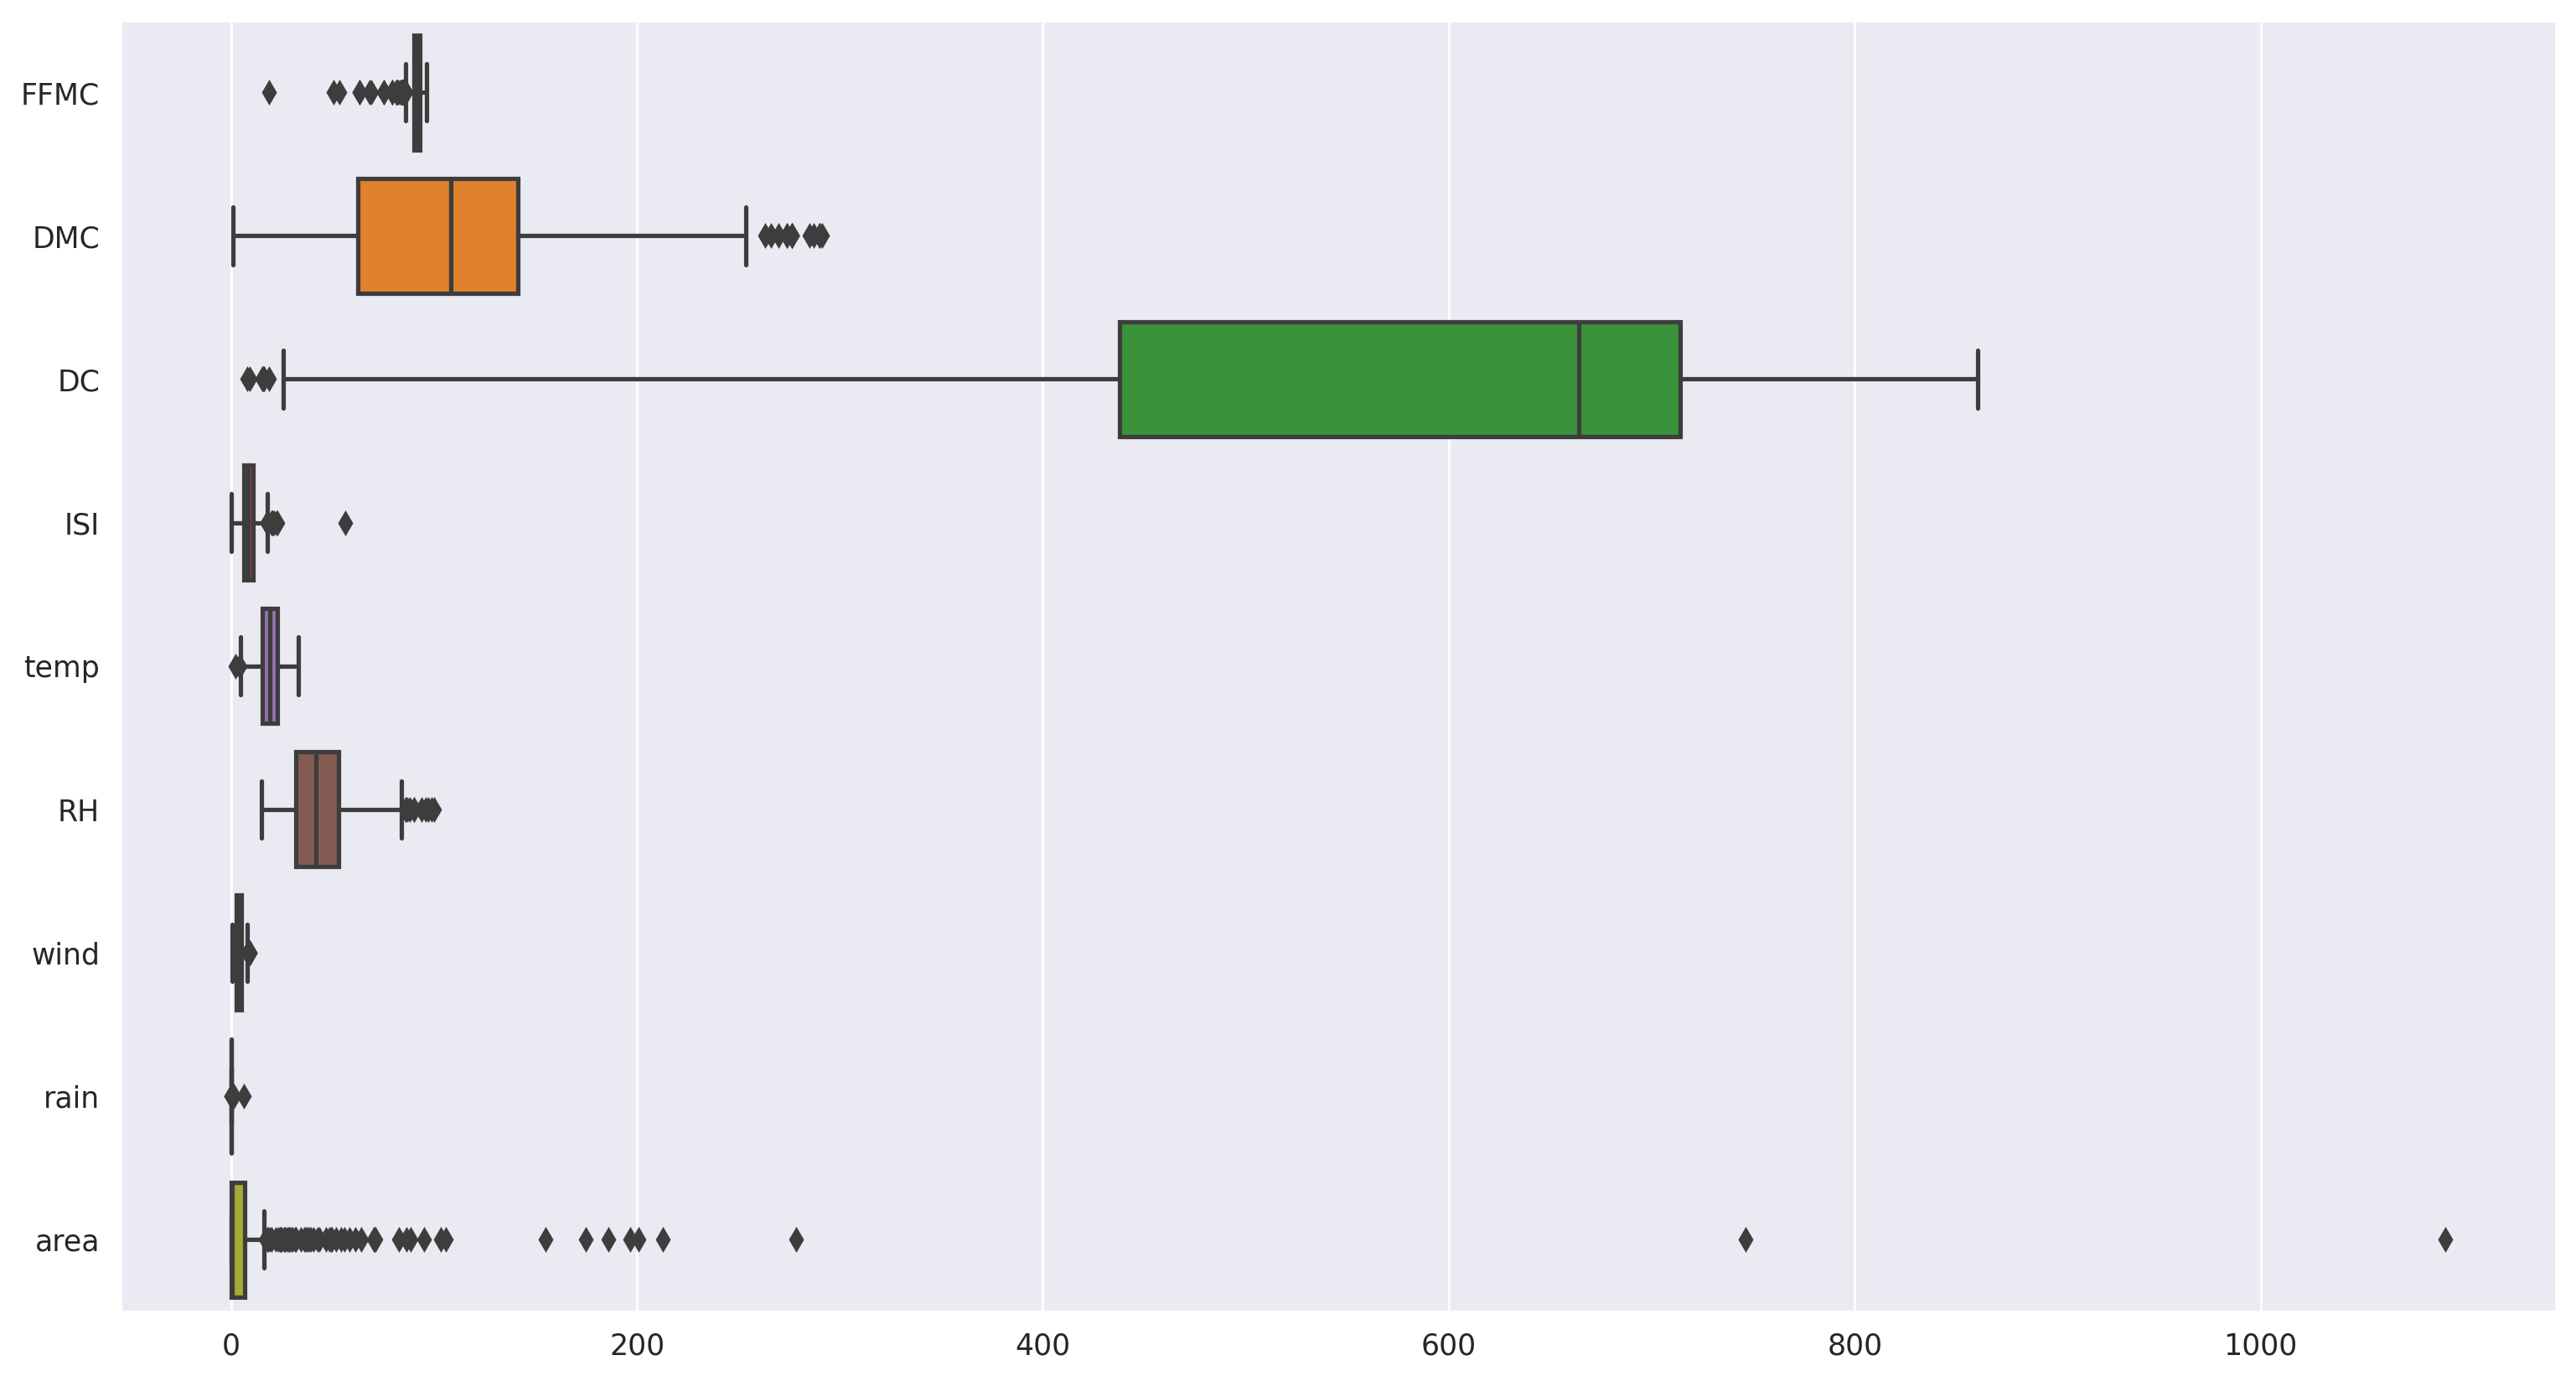

In [19]:
sns.cubehelix_palette(as_cmap=True)
sns.boxplot(data=ff.iloc[:,2:11],orient='h')


**Ploting Histplot**

array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>]], dtype=object)

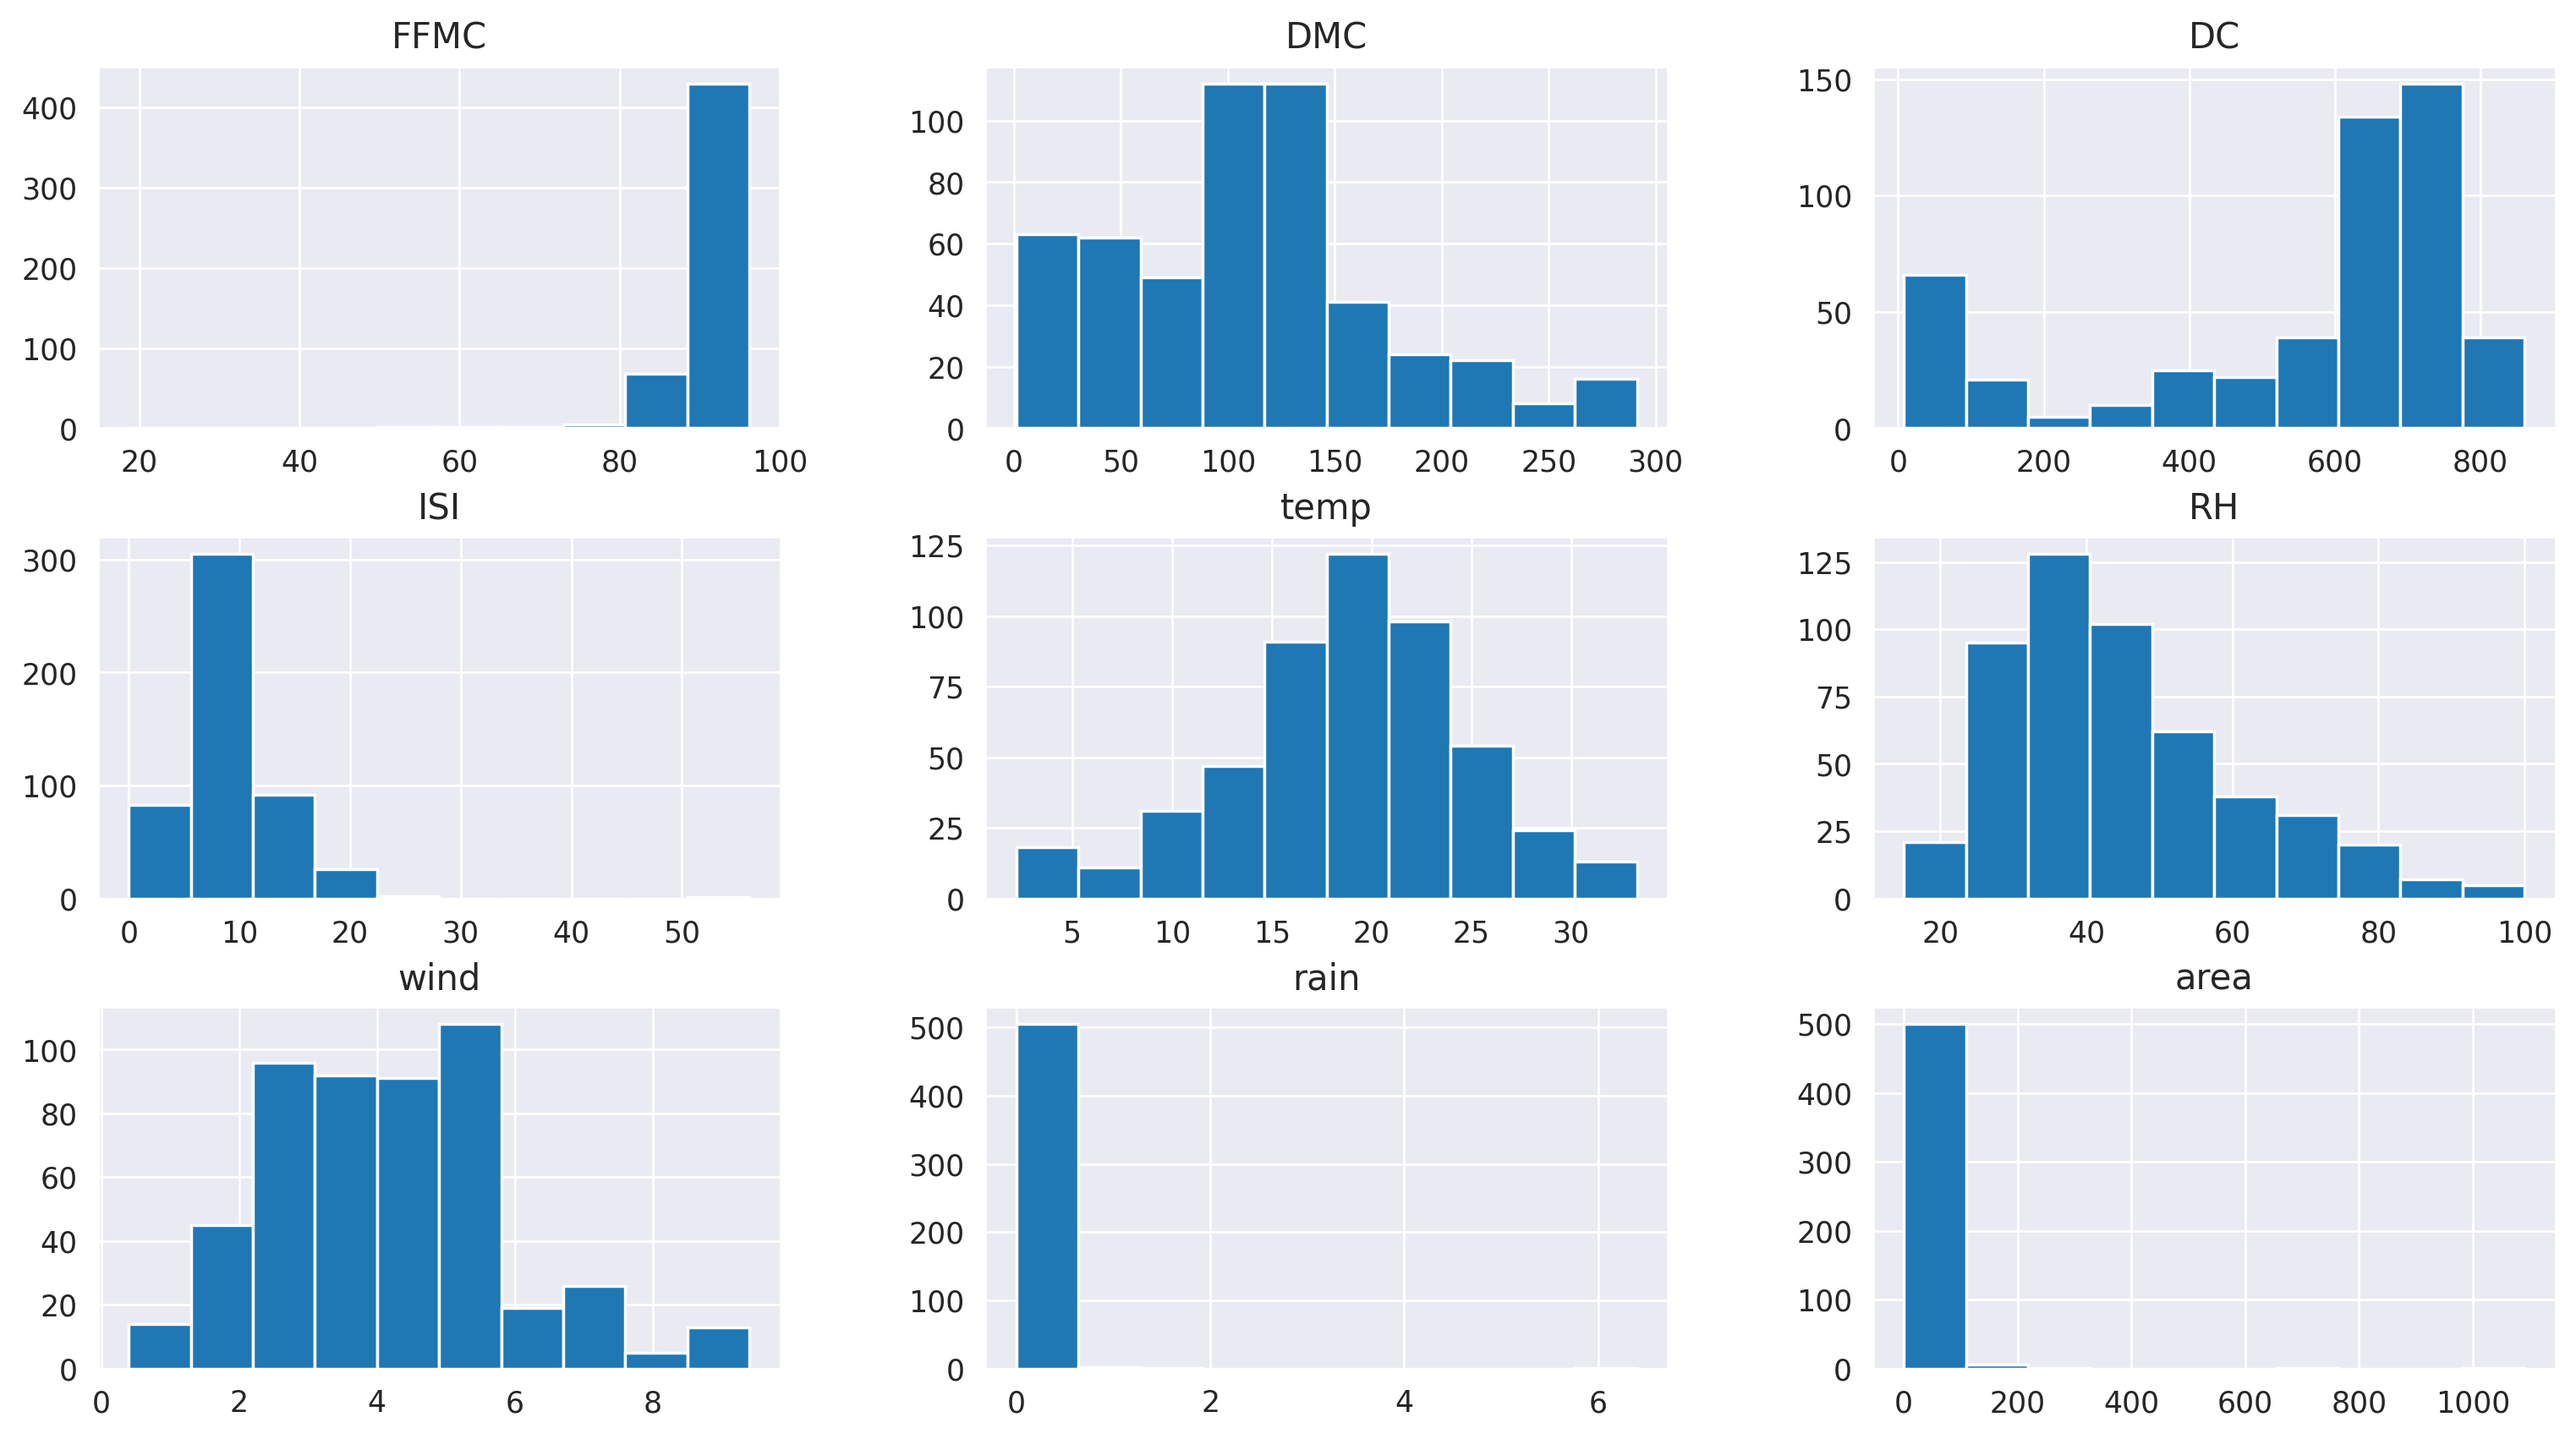

In [20]:
ff.iloc[:,2:11].hist()

**Ploting Pie-Plot**

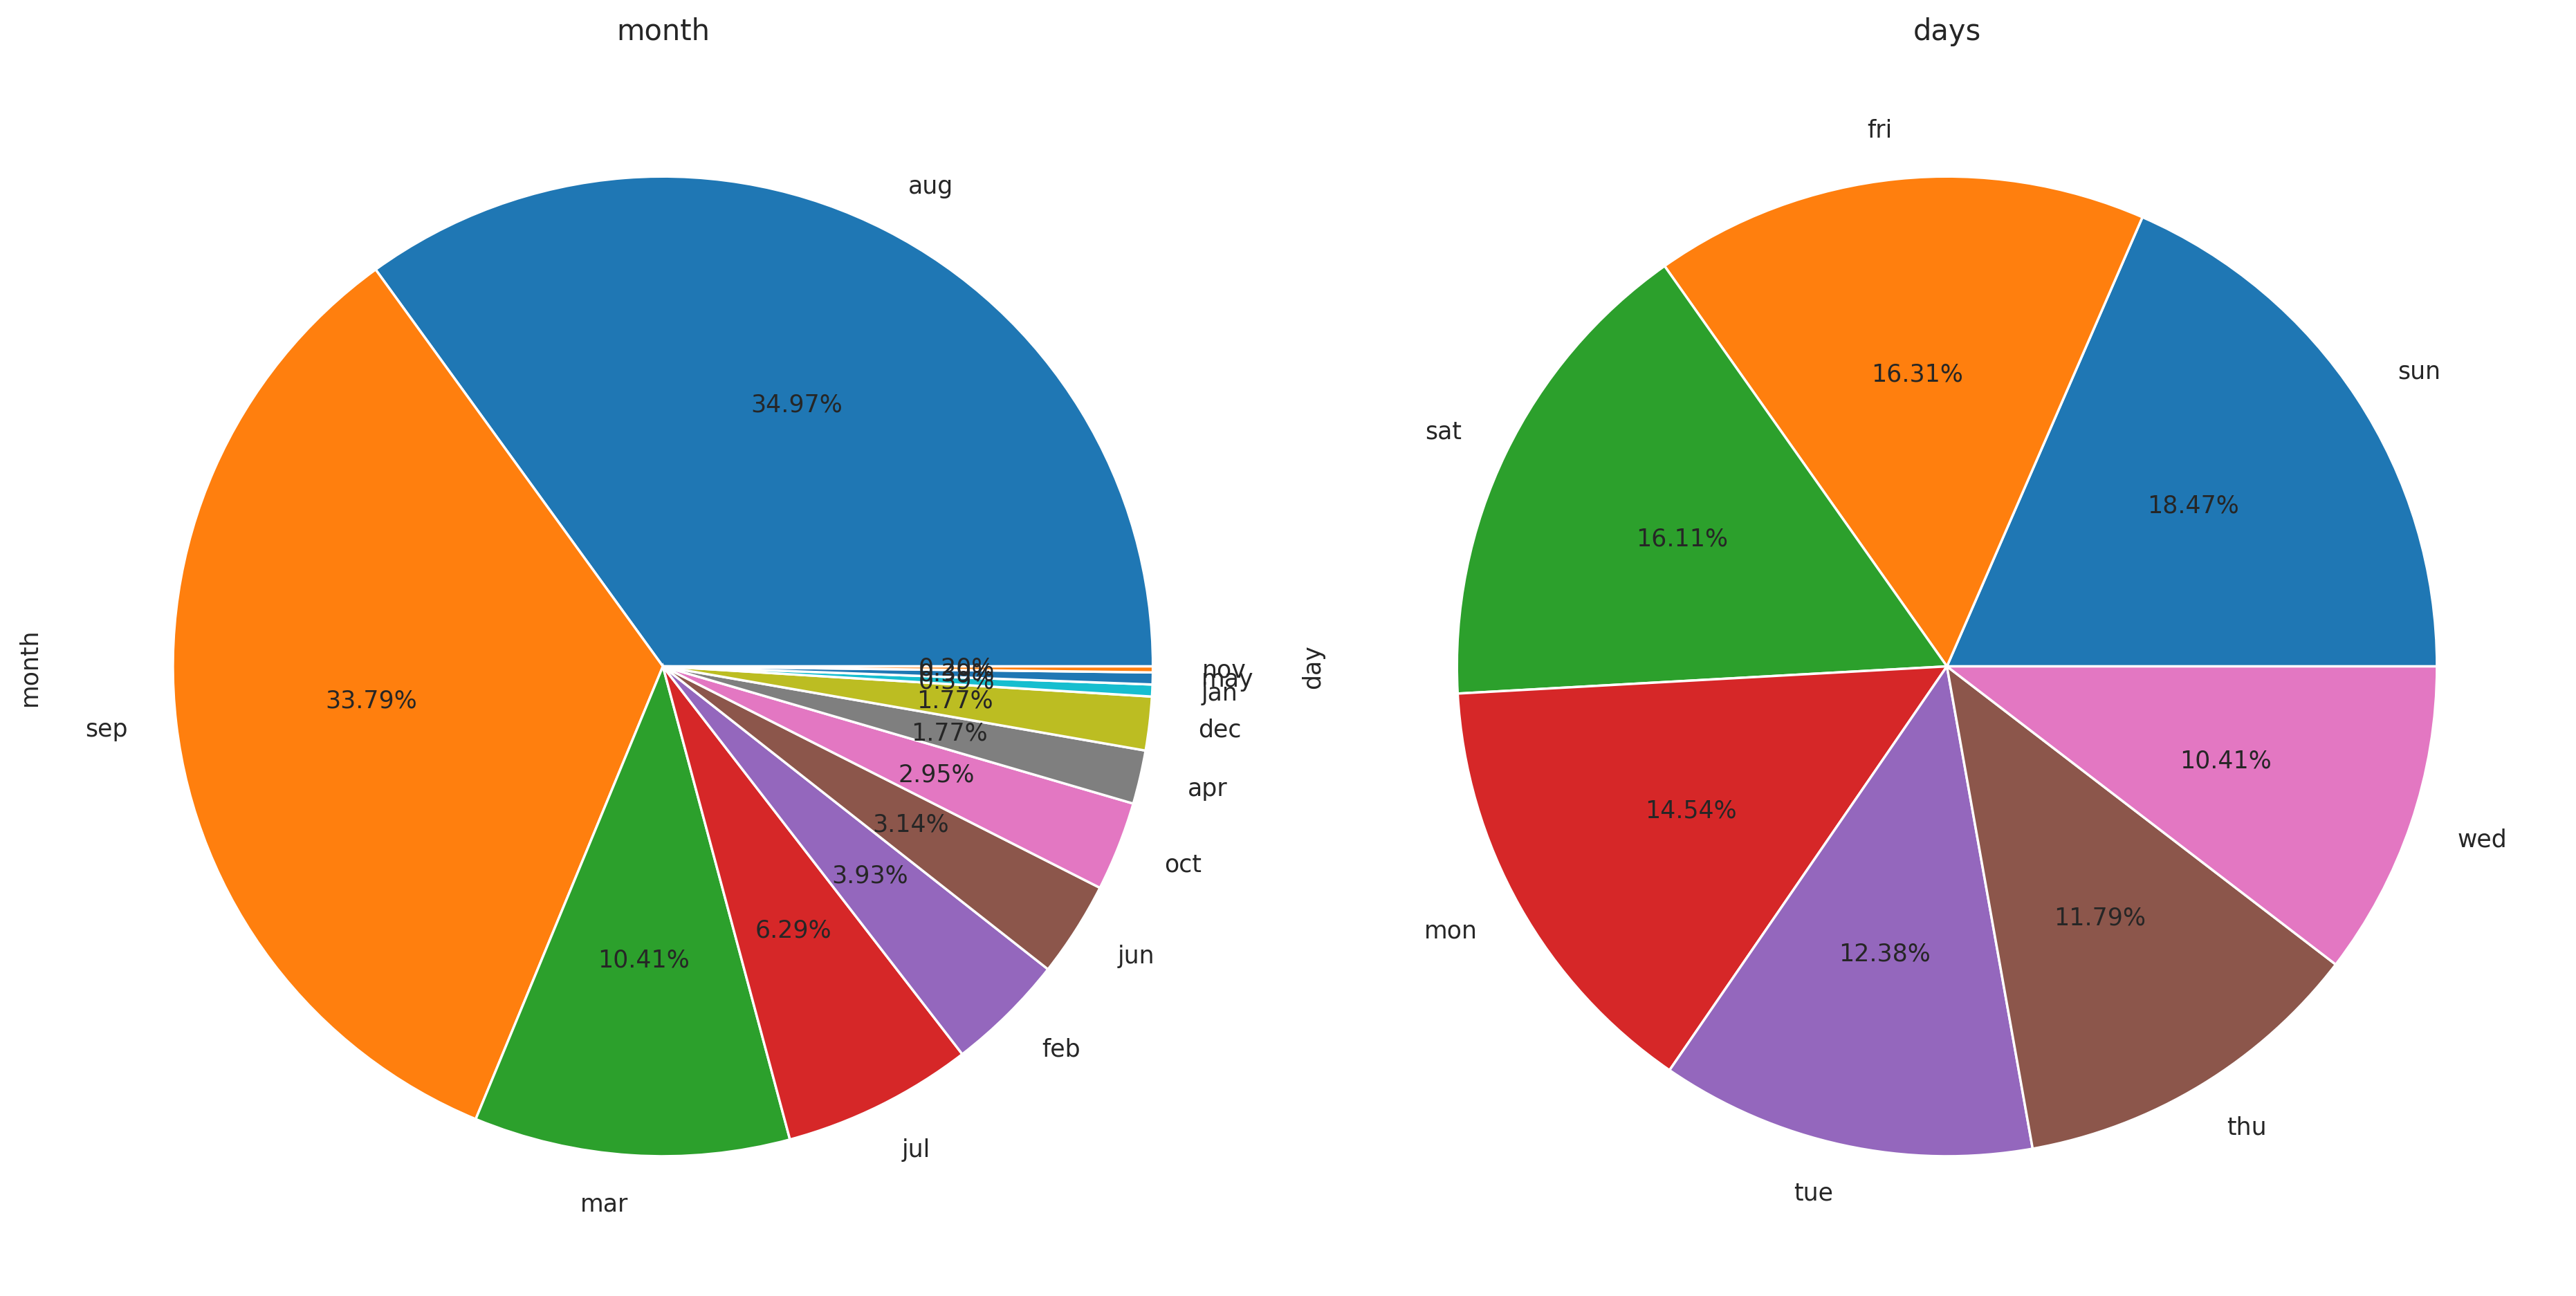

In [21]:
fig, ax = plt.subplots(ncols=2)
ax[0].title.set_text('month')
ff['month'].value_counts().plot(kind='pie', autopct = '%0.2f%%', ax= ax[0])
ax[1].title.set_text('days')
ff['day'].value_counts().plot(kind='pie', autopct = '%0.2f%%', ax= ax[1])
plt.tight_layout()


# Correlation Analysis

In [22]:
p = ff.iloc[:,2:11]
p['s'] = ff['size_category']

p

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area      s
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00  small
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00  small
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00  small
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00  small
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00  small
..    ...    ...    ...   ...   ...  ..   ...   ...    ...    ...
504  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44  large
505  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29  large
506  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16  large
507  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00  small
508  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00  small

[509 rows x 10 columns]

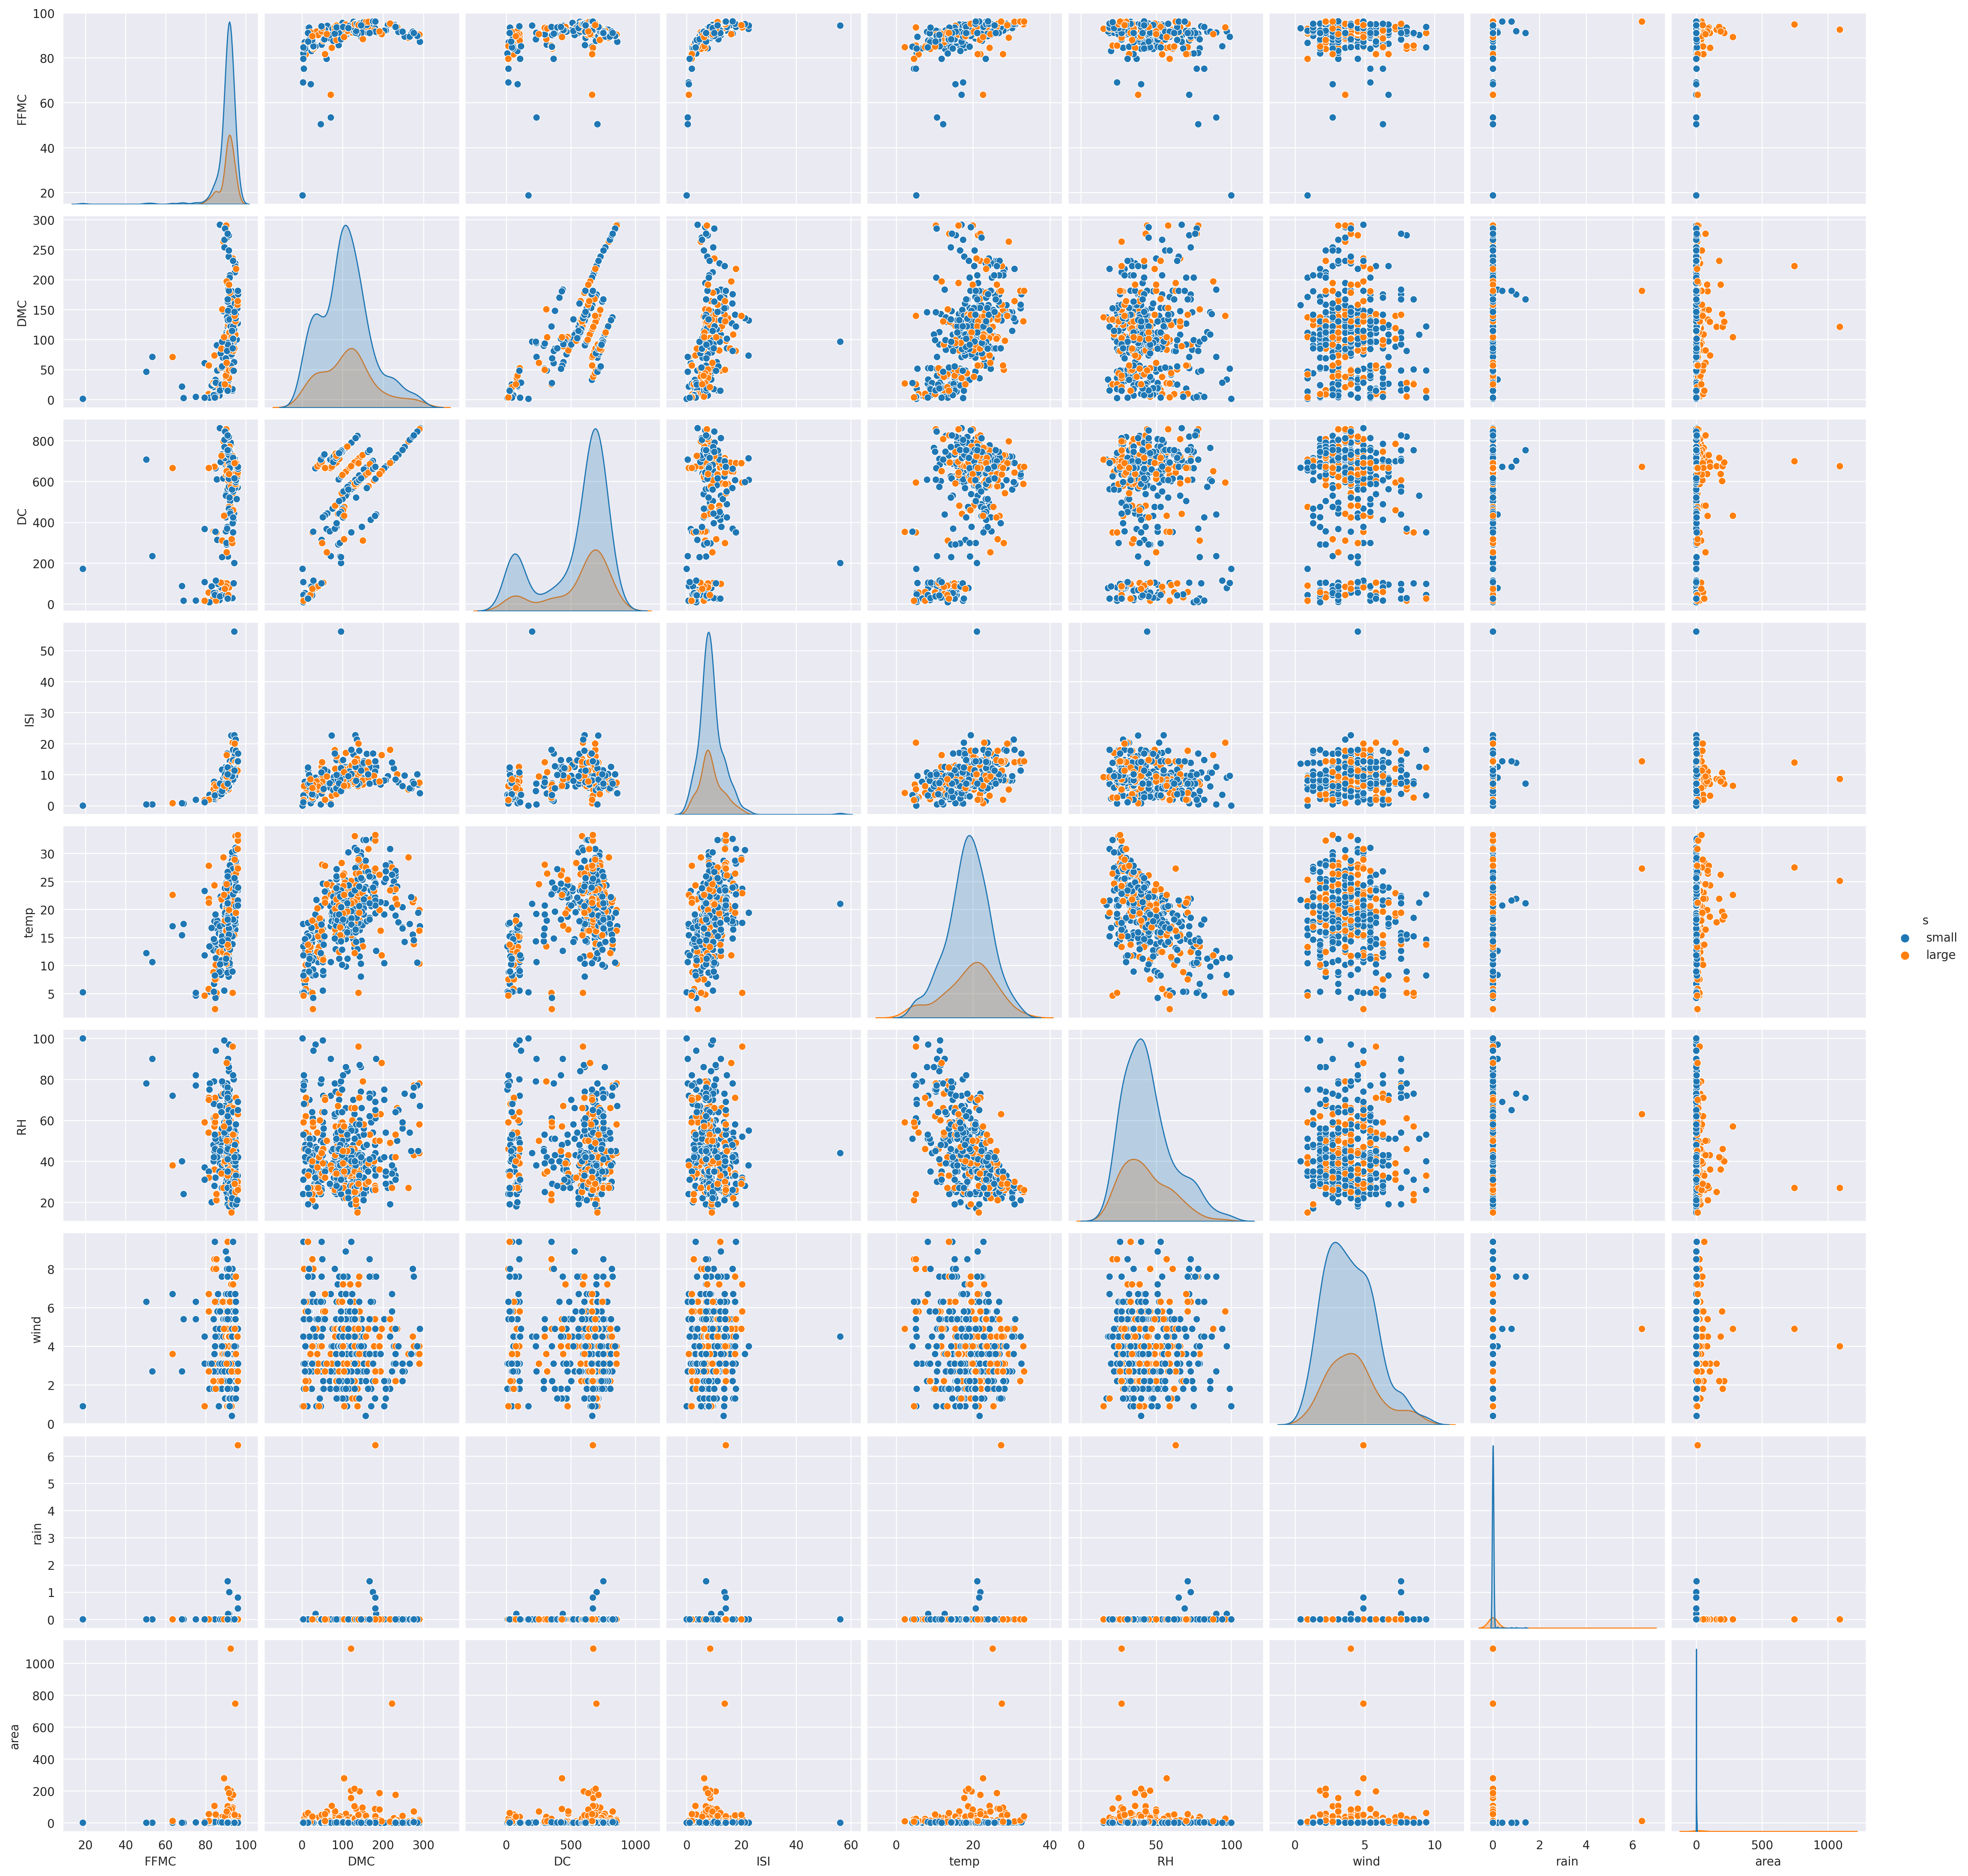

In [23]:
sns.pairplot(p, hue='s')

plt.show()

<Axes: >

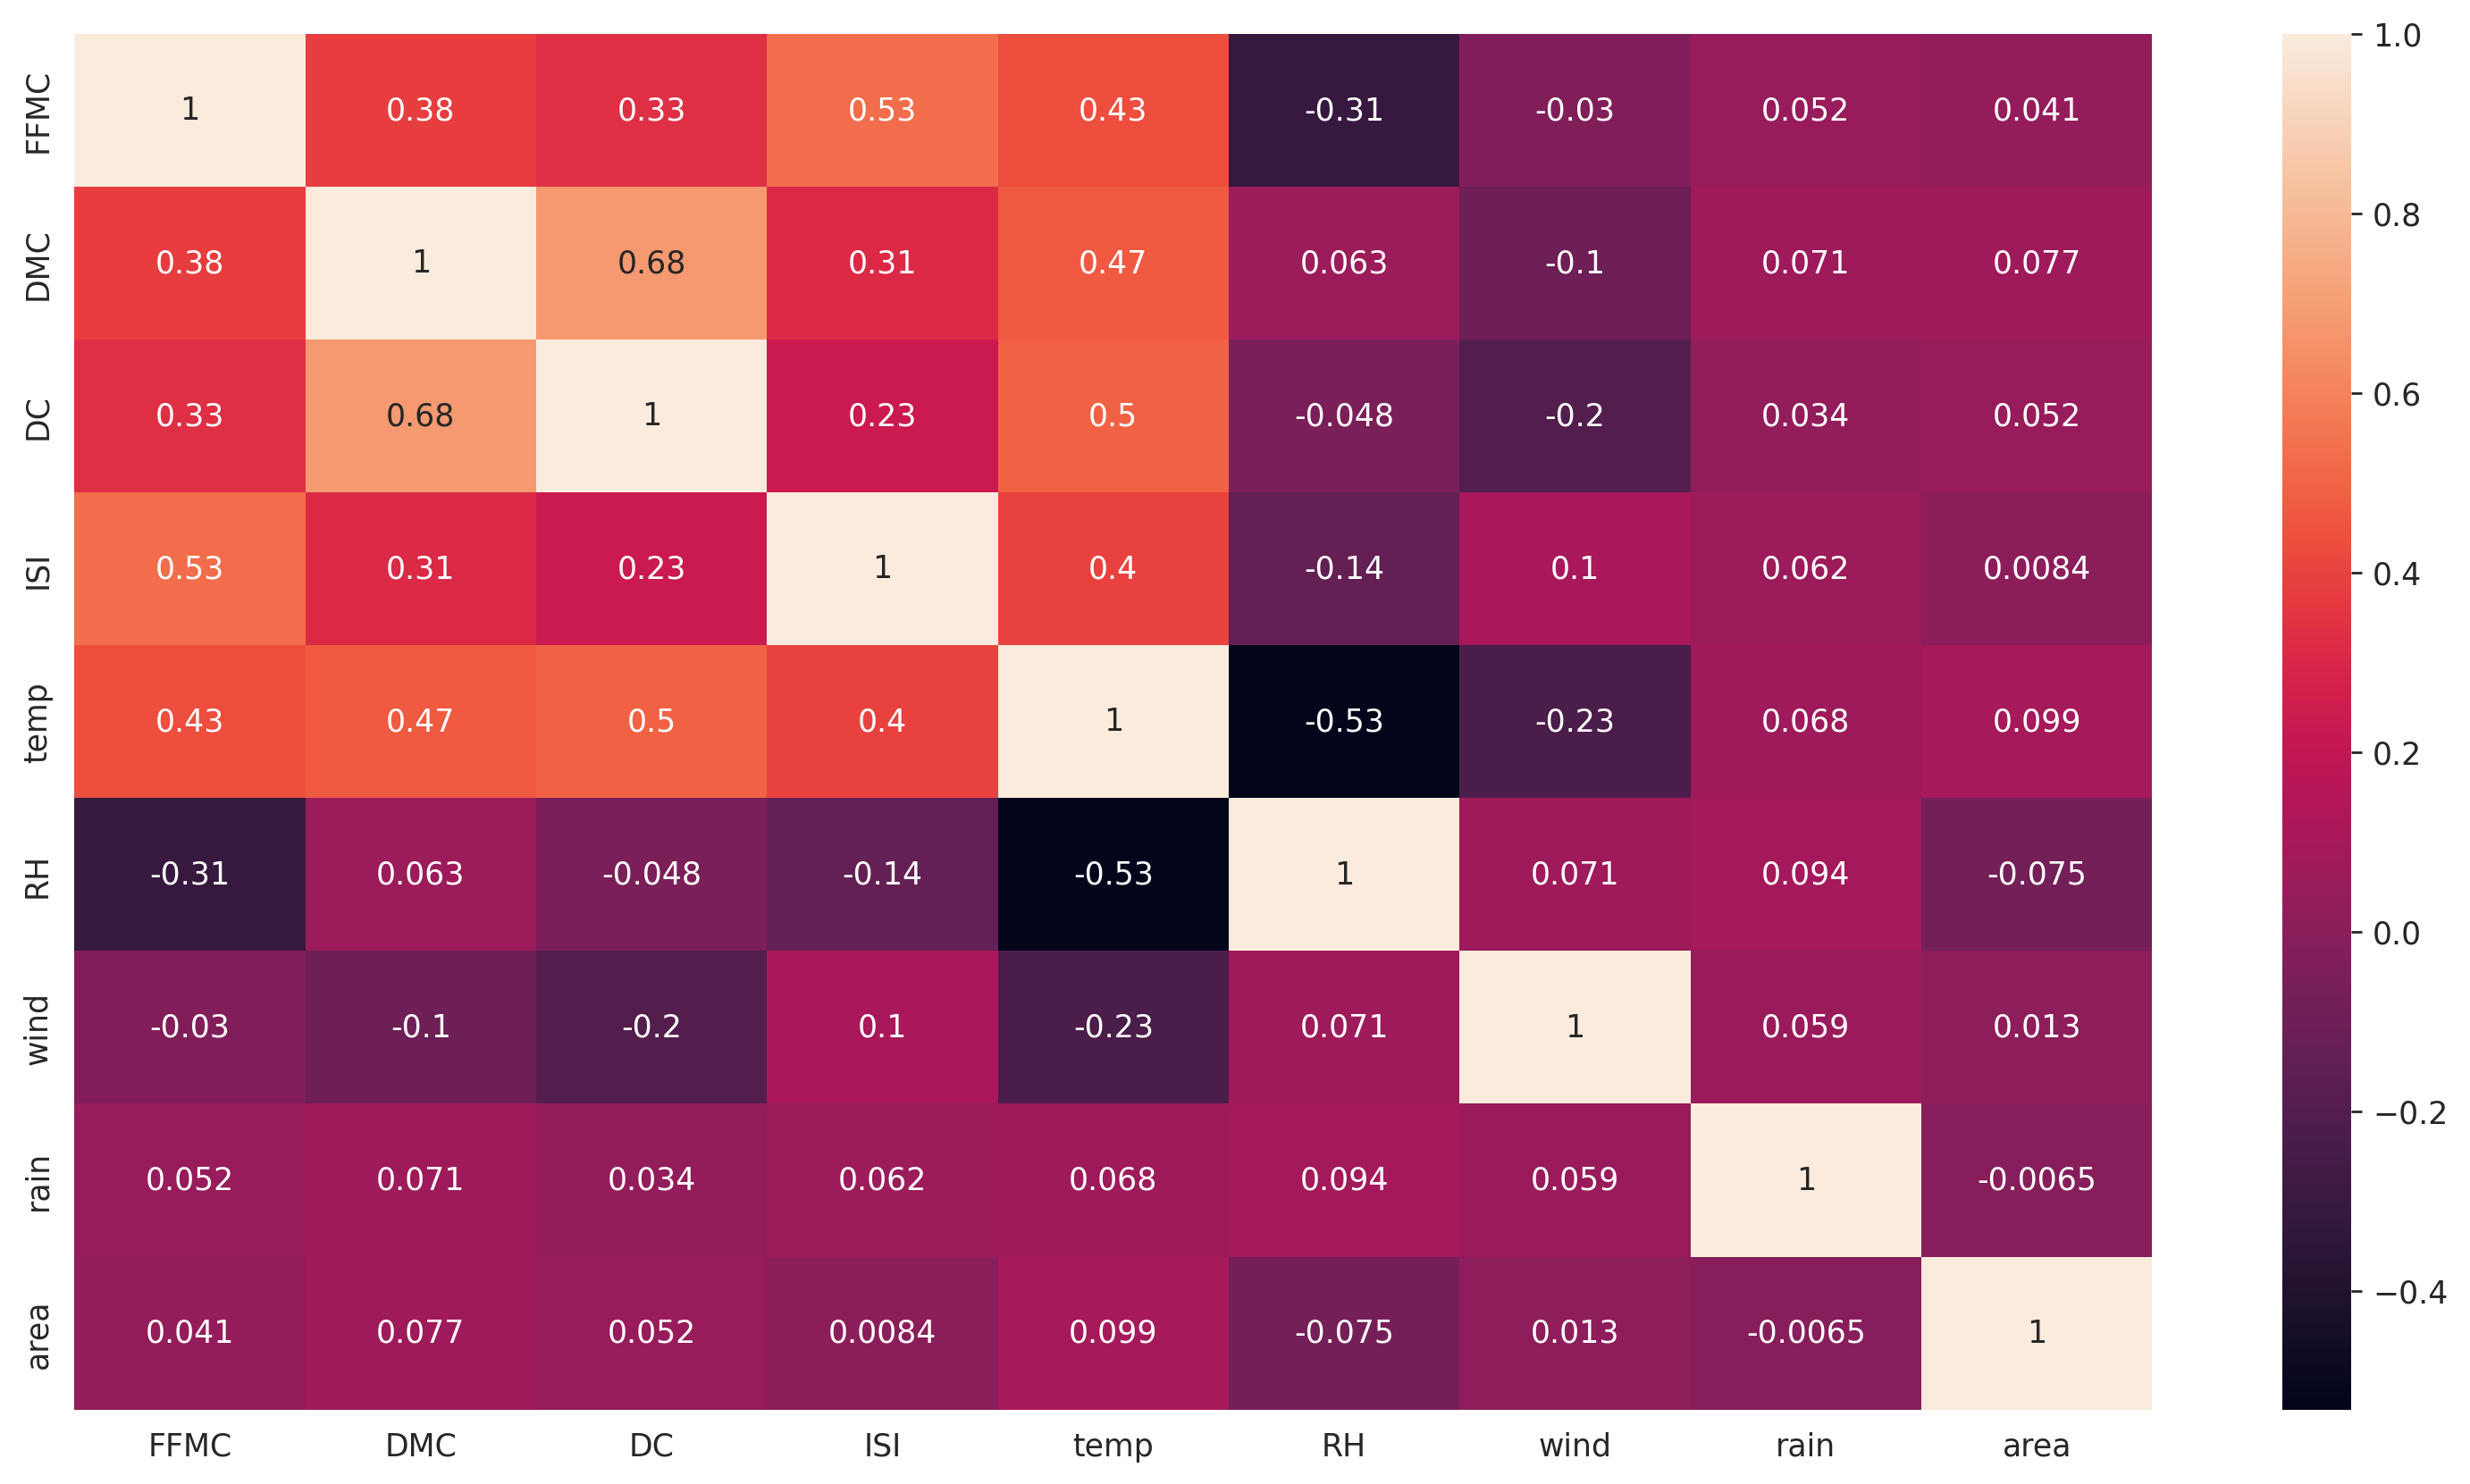

In [24]:
sns.heatmap(p.iloc[:,:-1].corr(), annot = True)


# Converting Categorical Data to Numerical Data

In [25]:
le = LabelEncoder()

# Converting ShelveLoc Data to Numerical Data

In [26]:
ff['size_category'] = le.fit_transform(ff['size_category'])

ff

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
504   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
505   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
506   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
507   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
508   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
504         0         0         0         0         0         0         0   
505         0         0         0         0         0         0         0   
506         0         0         0         0         0         0         0   
507         0         0         0         0         0         0         0   
508         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0              1  
1           0              1  
2           0              1  
3           0              1  
4           0              1  
..        ...            ...  
504         0              0  
505         0              0  
506         0              0  
507         0              1  
508         0              1  

[509 rows x 31 columns]

# Outlier Detection

In [27]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')

In [28]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)

In [29]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)

    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st

# Outlier Percentage (Before)

In [30]:
outlier_percentage(ff.iloc[:,2:11])

FFMC : 10.412573673870334 %
DMC : 3.143418467583497 %
DC : 1.5717092337917484 %
ISI : 2.75049115913556 %
temp : 0.3929273084479371 %
RH : 2.161100196463654 %
wind : 2.5540275049115913 %
rain : 1.37524557956778 %
area : 12.180746561886052 %


# Using Isolation Forest

In [31]:
iso = IsolationForest()
iso.fit(ff.iloc[:,2:11])
outliers =iso.predict(ff.iloc[:,2:11])
outliers

array([ 1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

# Creating Dataframe

In [32]:
ff['Outliers'] = outliers
ff

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthjan  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
504   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
505   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
506   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
507   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
508   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  \
0           0         0         1         0         0         0         0   
1           0         0         0         0         0         1         0   
2           0         0         0         0         0         1         0   
3           0         0         1         0         0         0         0   
4           0         0         1         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
504         0         0         0         0         0         0         0   
505         0         0         0         0         0         0         0   
506         0         0         0         0         0         0         0   
507         0         0         0         0         0         0         0   
508         0         0         0         0         1         0         0   

     size_category  Outliers  
0                1         1  
1                1         1  
2                1         1  
3                1        -1  
4                1        -1  
..             ...       ...  
504              0         1  
505              0        -1  
506              0        -1  
507              1         1  
508              1         1  

[509 rows x 32 columns]

In [33]:
ff.drop(ff[ff['Outliers']==-1].index, inplace=True)

# Outlier Percentage (After Using Isolation Forest)

In [35]:
outlier_percentage(ff.iloc[:,2:11])

FFMC : 6.578947368421052 %
DMC : 3.9473684210526314 %
DC : 14.692982456140353 %
ISI : 4.166666666666666 %
temp : 1.0964912280701753 %
RH : 2.1929824561403506 %
wind : 0.8771929824561403 %
rain : 0.21929824561403508 %
area : 11.842105263157894 %


# Replacing Outlier in FFMC Column

In [36]:
pe.box(ff['FFMC'], orientation = 'h')

In [37]:
replace_outlier_extream(ff, 'FFMC')

In [38]:
pe.box(ff['DMC'], orientation = 'h')

# Replacing Outlier in DC Column

In [39]:
pe.box(ff['DC'], orientation = 'h')

In [40]:
replace_outlier_extream(ff, 'DC')

In [41]:
pe.box(ff['DC'], orientation = 'h')

# Replacing Outlier in ISI Column

In [42]:
pe.box(ff['ISI'], orientation = 'h')

In [43]:
replace_outlier_extream(ff, 'ISI')

In [44]:
pe.box(ff['ISI'], orientation = 'h')


# Replacing Outlier in Area Column

In [45]:
pe.box(ff['area'], orientation = 'h')

In [46]:
replace_outlier_extream(ff, 'area')

In [47]:
pe.box(ff['area'], orientation = 'h')


# Outlier Percentage (After)

In [48]:
outlier_percentage(ff.iloc[:,2:11])

FFMC : 0.0 %
DMC : 3.9473684210526314 %
DC : 0.0 %
ISI : 0.0 %
temp : 1.0964912280701753 %
RH : 2.1929824561403506 %
wind : 0.8771929824561403 %
rain : 0.21929824561403508 %
area : 0.0 %


# Reindexing Columns

In [49]:
ff.reset_index(inplace=True)
ff.drop(columns=['index', 'Outliers'], inplace=True)

ff

month  day   FFMC    DMC        DC   ISI  temp  RH  wind  rain  ...  \
0     mar  fri  87.15   26.2  204.5375   5.1   8.2  51   6.7   0.0  ...   
1     oct  tue  90.60   35.4  669.1000   6.7  18.0  33   0.9   0.0  ...   
2     oct  sat  90.60   43.7  686.9000   6.7  14.6  33   1.3   0.0  ...   
3     aug  sun  92.30   85.3  488.0000  14.7  22.2  29   5.4   0.0  ...   
4     aug  mon  92.30   88.9  495.6000   8.5  24.1  27   3.1   0.0  ...   
..    ...  ...    ...    ...       ...   ...   ...  ..   ...   ...  ...   
451   aug  fri  91.00  166.9  752.6000   7.1  18.2  62   5.4   0.0  ...   
452   aug  sun  87.15   56.7  665.6000   1.9  27.8  35   2.7   0.0  ...   
453   aug  sun  87.15   56.7  665.6000   1.9  27.8  32   2.7   0.0  ...   
454   aug  sat  94.40  146.0  614.7000  11.3  25.6  42   4.0   0.0  ...   
455   nov  tue  87.15    3.0  204.5375   1.1  11.8  31   4.5   0.0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
451         0         0         0         0         0         0         0   
452         0         0         0         0         0         0         0   
453         0         0         0         0         0         0         0   
454         0         0         0         0         0         0         0   
455         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
451         0         0              1  
452         0         0              1  
453         0         0              0  
454         0         0              1  
455         0         0              1  

[456 rows x 31 columns]

## Splitting The Data Into Target and Independent set

In [50]:
x = ff.iloc[:,2:-1]
y = ff['size_category']

In [51]:
x

FFMC    DMC        DC   ISI  temp  RH  wind  rain  area  dayfri  ...  \
0    87.15   26.2  204.5375   5.1   8.2  51   6.7   0.0  0.00       1  ...   
1    90.60   35.4  669.1000   6.7  18.0  33   0.9   0.0  0.00       0  ...   
2    90.60   43.7  686.9000   6.7  14.6  33   1.3   0.0  0.00       0  ...   
3    92.30   85.3  488.0000  14.7  22.2  29   5.4   0.0  0.00       0  ...   
4    92.30   88.9  495.6000   8.5  24.1  27   3.1   0.0  0.00       0  ...   
..     ...    ...       ...   ...   ...  ..   ...   ...   ...     ...  ...   
451  91.00  166.9  752.6000   7.1  18.2  62   5.4   0.0  0.43       1  ...   
452  87.15   56.7  665.6000   1.9  27.8  35   2.7   0.0  0.00       0  ...   
453  87.15   56.7  665.6000   1.9  27.8  32   2.7   0.0  6.44       0  ...   
454  94.40  146.0  614.7000  11.3  25.6  42   4.0   0.0  0.00       0  ...   
455  87.15    3.0  204.5375   1.1  11.8  31   4.5   0.0  0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
451         0         0         0         0         0         0         0   
452         0         0         0         0         0         0         0   
453         0         0         0         0         0         0         0   
454         0         0         0         0         0         0         0   
455         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
451         0         0         0  
452         0         0         0  
453         0         0         0  
454         0         0         0  
455         1         0         0  

[456 rows x 28 columns]

# Normalizing The Dataset

In [52]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [53]:
scaled_x

FFMC       DMC        DC       ISI      temp        RH      wind  \
0   -2.130382 -1.472219 -1.990807 -1.124320 -2.182446  0.613440  1.776336   
1   -0.494458 -1.316036  0.424470 -0.678842 -0.299244 -0.656771 -1.815723   
2   -0.494458 -1.175132  0.517013 -0.678842 -0.952600 -0.656771 -1.567994   
3    0.311649 -0.468914 -0.517075  1.548551  0.507843 -0.939040  0.971219   
4    0.311649 -0.407799 -0.477562 -0.177679  0.872953 -1.080175 -0.453218   
..        ...       ...       ...       ...       ...       ...       ...   
451 -0.304786  0.916361  0.858590 -0.567472 -0.260811  1.389680  0.971219   
452 -2.130382 -0.954439  0.406274 -2.015277  1.583958 -0.515636 -0.700946   
453 -2.130382 -0.954439  0.406274 -2.015277  1.583958 -0.727338 -0.700946   
454  1.307429  0.561554  0.141643  0.601909  1.161198 -0.021665  0.104171   
455 -2.130382 -1.866072 -1.990807 -2.238017 -1.490657 -0.797906  0.413831   

         rain      area    dayfri  ...  monthdec  monthfeb  monthjan  \
0   -0.046881 -0.685111  2.272039  ... -0.066372 -0.149738       0.0   
1   -0.046881 -0.685111 -0.440133  ... -0.066372 -0.149738       0.0   
2   -0.046881 -0.685111 -0.440133  ... -0.066372 -0.149738       0.0   
3   -0.046881 -0.685111 -0.440133  ... -0.066372 -0.149738       0.0   
4   -0.046881 -0.685111 -0.440133  ... -0.066372 -0.149738       0.0   
..        ...       ...       ...  ...       ...       ...       ...   
451 -0.046881 -0.600620  2.272039  ... -0.066372 -0.149738       0.0   
452 -0.046881 -0.685111 -0.440133  ... -0.066372 -0.149738       0.0   
453 -0.046881  0.580296 -0.440133  ... -0.066372 -0.149738       0.0   
454 -0.046881 -0.685111 -0.440133  ... -0.066372 -0.149738       0.0   
455 -0.046881 -0.685111 -0.440133  ... -0.066372 -0.149738       0.0   

     monthjul  monthjun  monthmar  monthmay   monthnov  monthoct  monthsep  
0   -0.255774 -0.177972  2.882034 -0.066372  -0.046881 -0.184428 -0.749429  
1   -0.255774 -0.177972 -0.346977 -0.066372  -0.046881  5.422177 -0.749429  
2   -0.255774 -0.177972 -0.346977 -0.066372  -0.046881  5.422177 -0.749429  
3   -0.255774 -0.177972 -0.346977 -0.066372  -0.046881 -0.184428 -0.749429  
4   -0.255774 -0.177972 -0.346977 -0.066372  -0.046881 -0.184428 -0.749429  
..        ...       ...       ...       ...        ...       ...       ...  
451 -0.255774 -0.177972 -0.346977 -0.066372  -0.046881 -0.184428 -0.749429  
452 -0.255774 -0.177972 -0.346977 -0.066372  -0.046881 -0.184428 -0.749429  
453 -0.255774 -0.177972 -0.346977 -0.066372  -0.046881 -0.184428 -0.749429  
454 -0.255774 -0.177972 -0.346977 -0.066372  -0.046881 -0.184428 -0.749429  
455 -0.255774 -0.177972 -0.346977 -0.066372  21.330729 -0.184428 -0.749429  

[456 rows x 28 columns]

# Splitting The Data Into Training And Testing Set

In [54]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,train_size=0.75,random_state=1)

In [55]:
xtrain

FFMC       DMC        DC       ISI      temp        RH      wind  \
230  0.690994  0.753387  0.411993  1.214442  0.853737 -0.445069 -0.453218   
11   0.596158  0.345954  0.583041  0.017218  1.314929 -1.503578  0.413831   
106 -1.679911 -1.480707 -1.990807 -1.486272 -0.779653 -1.080175  1.528608   
414  0.975502  2.006246  0.663626 -0.205521 -0.126297  1.530815  0.661559   
207  0.880666  0.617576  0.733813 -0.289048  0.642357 -0.233367  0.661559   
..        ...       ...       ...       ...       ...       ...       ...   
255 -2.130382 -1.804957 -1.990807 -1.653326 -2.067148 -0.515636 -0.453218   
72  -0.731549 -0.083549 -0.299755  0.936018 -0.933383  1.671949 -0.700946   
396  0.975502  2.006246  0.663626 -0.205521  0.776871  0.754575  0.104171   
235  1.212593  0.072634 -0.033045  0.518382  0.834520 -0.092233 -1.010606   
37  -0.684131 -0.271987  0.191034 -0.066309 -0.222379 -0.021665  1.776336   

         rain      area    dayfri  ...  monthdec  monthfeb  monthjan  \
230 -0.046881 -0.637953 -0.440133  ... -0.066372 -0.149738       0.0   
11  -0.046881 -0.685111 -0.440133  ... -0.066372 -0.149738       0.0   
106 -0.046881 -0.685111 -0.440133  ... -0.066372 -0.149738       0.0   
414 -0.046881 -0.032758 -0.440133  ... -0.066372 -0.149738       0.0   
207 -0.046881  2.182441 -0.440133  ... -0.066372 -0.149738       0.0   
..        ...       ...       ...  ...       ...       ...       ...   
255 -0.046881 -0.468970 -0.440133  ... -0.066372  6.678323       0.0   
72  -0.046881 -0.685111  2.272039  ... -0.066372 -0.149738       0.0   
396 -0.046881  0.578331 -0.440133  ... -0.066372 -0.149738       0.0   
235 -0.046881  0.890753 -0.440133  ... -0.066372 -0.149738       0.0   
37  -0.046881 -0.685111 -0.440133  ... -0.066372 -0.149738       0.0   

     monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  
230 -0.255774 -0.177972 -0.346977 -0.066372 -0.046881 -0.184428 -0.749429  
11  -0.255774 -0.177972 -0.346977 -0.066372 -0.046881 -0.184428  1.334349  
106 -0.255774 -0.177972  2.882034 -0.066372 -0.046881 -0.184428 -0.749429  
414 -0.255774 -0.177972 -0.346977 -0.066372 -0.046881 -0.184428 -0.749429  
207 -0.255774 -0.177972 -0.346977 -0.066372 -0.046881 -0.184428  1.334349  
..        ...       ...       ...       ...       ...       ...       ...  
255 -0.255774 -0.177972 -0.346977 -0.066372 -0.046881 -0.184428 -0.749429  
72  -0.255774 -0.177972 -0.346977 -0.066372 -0.046881 -0.184428 -0.749429  
396 -0.255774 -0.177972 -0.346977 -0.066372 -0.046881 -0.184428 -0.749429  
235 -0.255774 -0.177972 -0.346977 -0.066372 -0.046881 -0.184428 -0.749429  
37  -0.255774 -0.177972 -0.346977 -0.066372 -0.046881 -0.184428 -0.749429  

[342 rows x 28 columns]

# Preparing Model From The Dataset
Creating Default Model With ANN

Creating ann_def Model

In [56]:
ann_def =Sequential()

# Creating Hidden Layer

In [57]:
ann_def.add(Dense(units=1, activation='sigmoid'))

Connecting All Neurons In Each Layer

In [58]:
ann_def.compile(optimizer='adam', loss='binary_crossentropy')

fitting Data

In [59]:
ann_def.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 50)

Epoch 1/50
11/11 [==============================] - 1s 43ms/step - loss: 0.7281 - val_loss: 0.6660
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.7142 - val_loss: 0.6582
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 0.7008 - val_loss: 0.6505
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6877 - val_loss: 0.6436
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.6749 - val_loss: 0.6369
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.6635 - val_loss: 0.6300
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 0.6511 - val_loss: 0.6239
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - loss: 0.6397 - val_loss: 0.6180
Epoch 9/50
11/11 [==============================] - 0s 5ms/step - loss: 0.6286 - val_loss: 0.6126
Epoch 10/50
11/11 [==============================] - 0s 5ms/step - loss: 0.6183 - val_loss: 0.6073
Epoch 11/50
11/11 

# Evaluating The Model
Ploting Line-Plot

Text(0.5, 0, 'No Of Epochs')

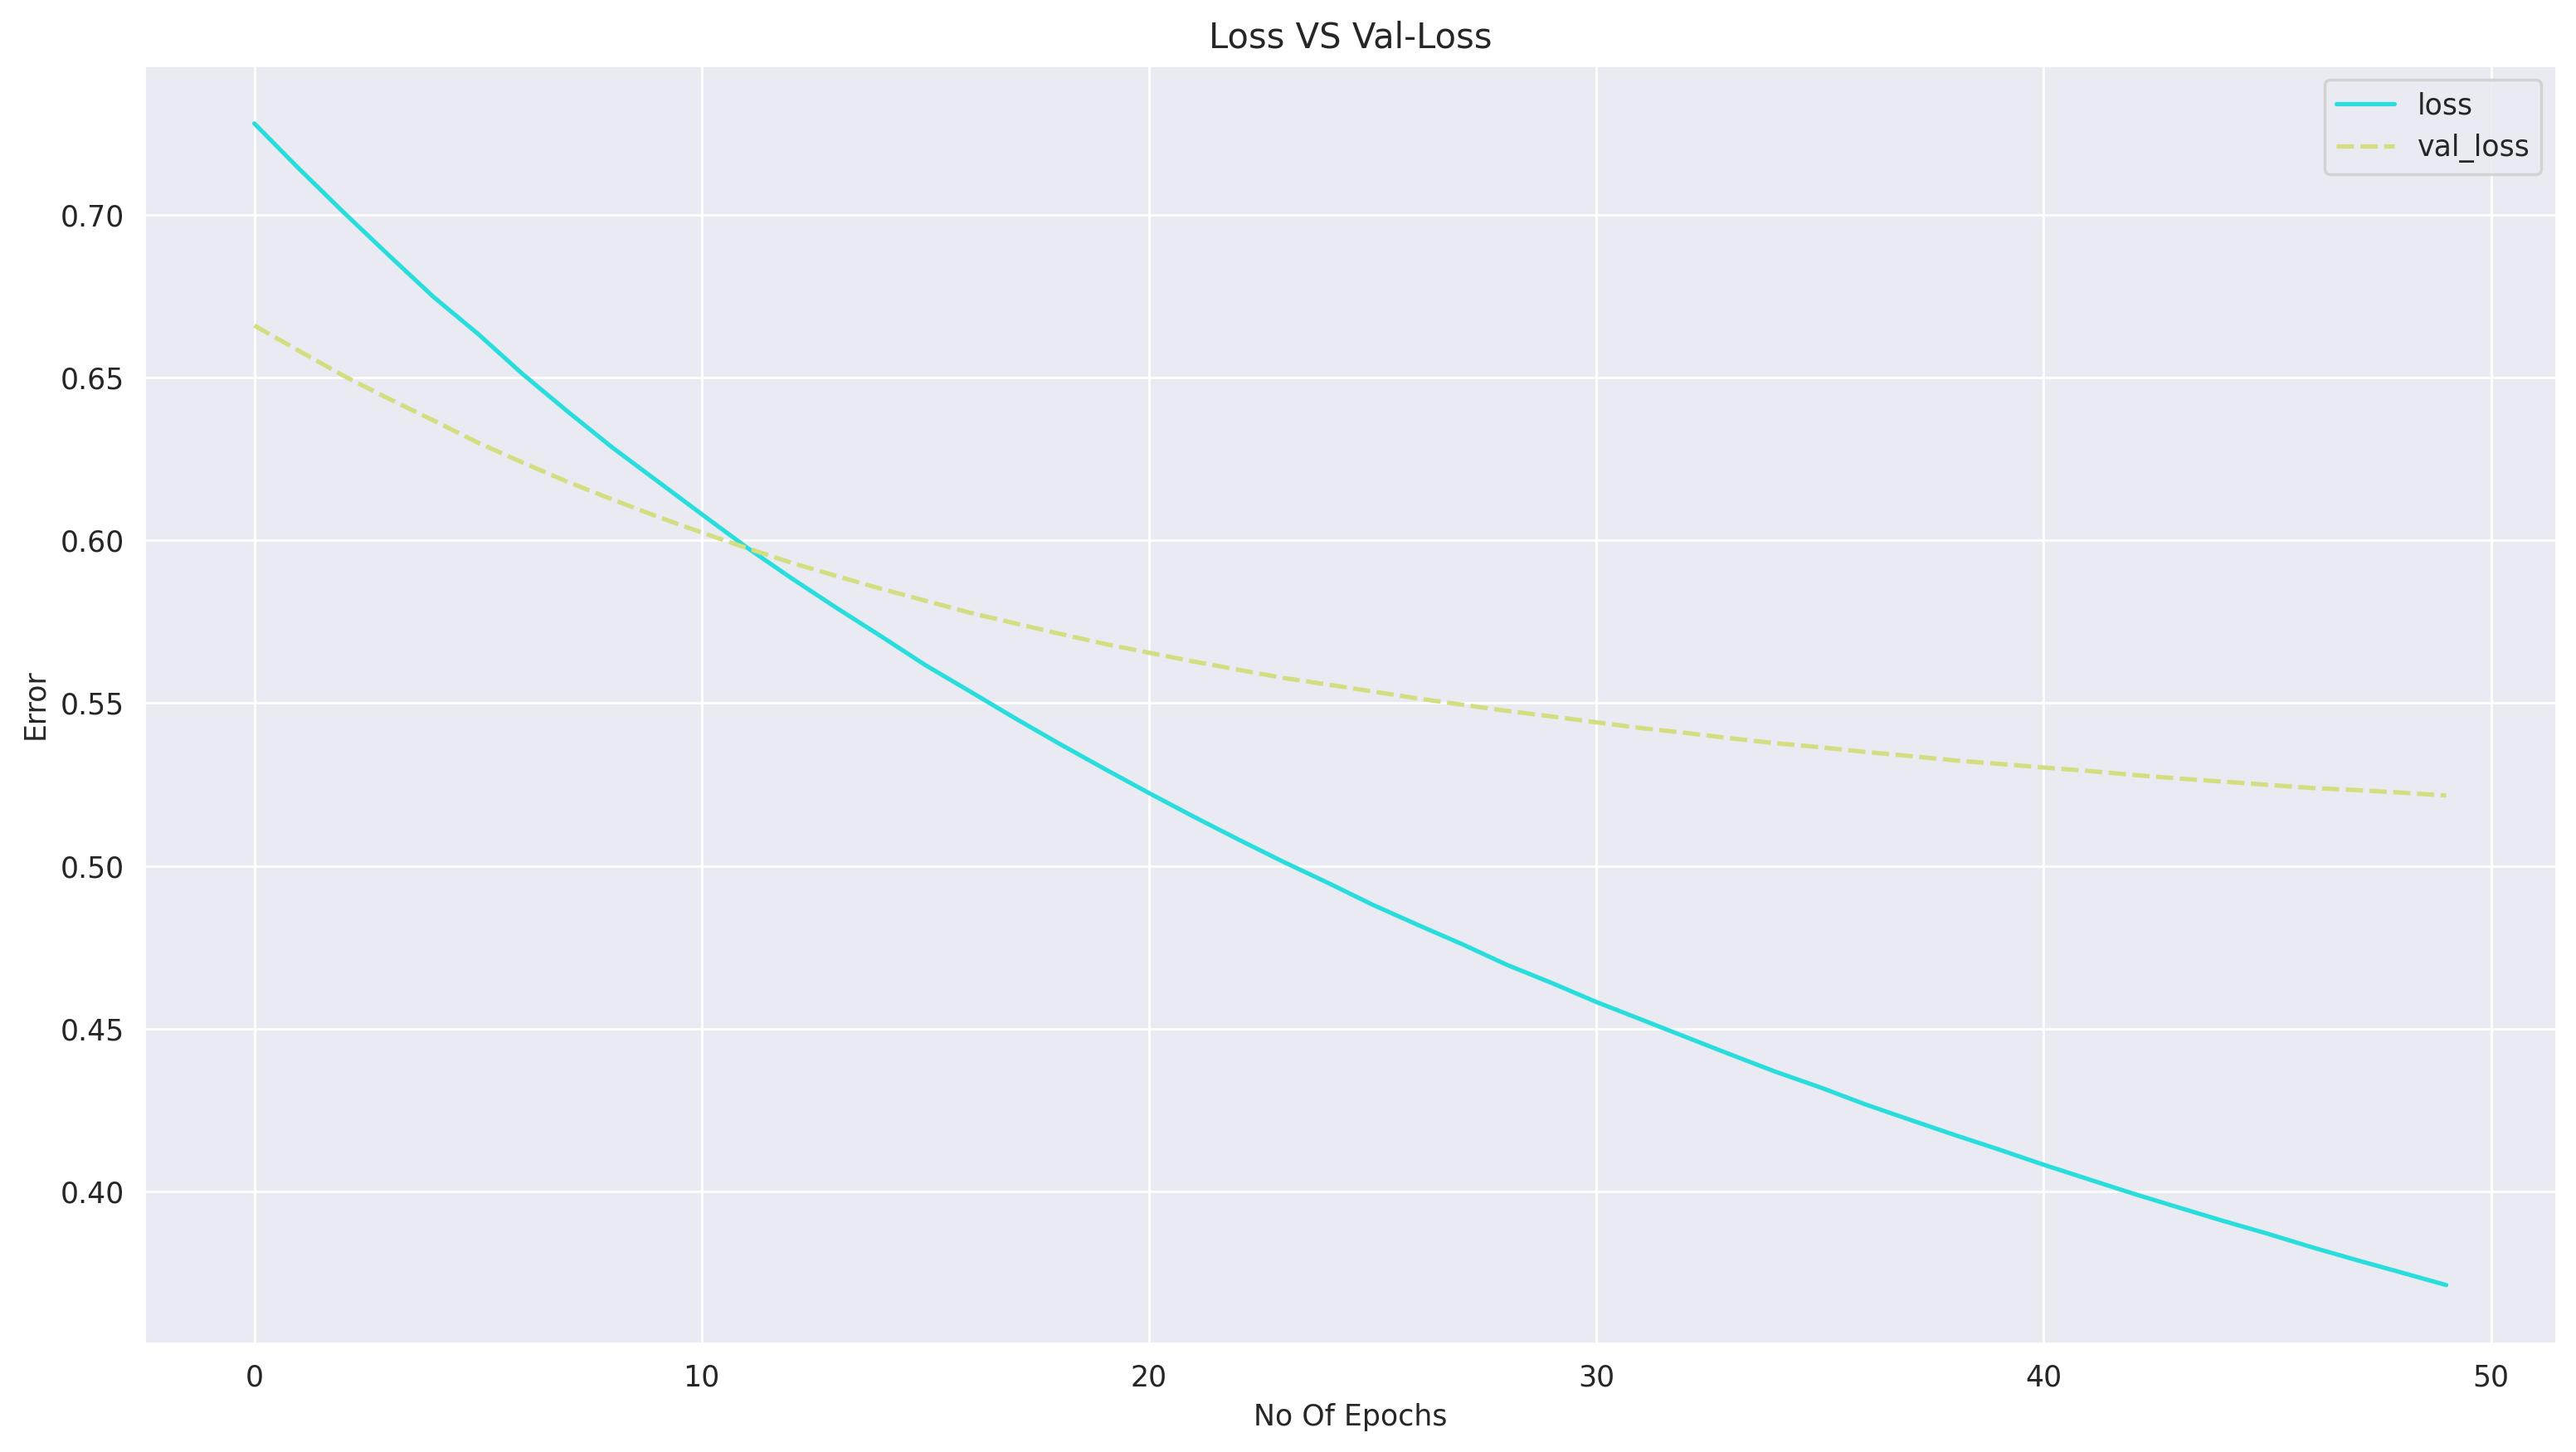

In [60]:
val_loss_def = pd.DataFrame(ann_def.history.history)

sns.lineplot(data = val_loss_def, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

Creating Classification Report

In [61]:
ypred_def = ann_def.predict(xtest)
ypred_def = ypred_def > 0.5

4/4 [==============================] - 0s 4ms/step


In [62]:
print(classification_report(ytest,ypred_def))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.94      0.97      0.95        87

    accuracy                           0.93       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.93      0.93      0.93       114



# Creating Model With Early Stopping
Creating ann Model

In [63]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [64]:
ann_es =Sequential()

# Creating Hidden Layer

In [65]:
ann_es.add(Dense(units=1, activation='sigmoid'))

Connecting All Neurons In Each Layer

In [66]:
ann_es.compile(optimizer='adam',loss='binary_crossentropy')

# Fitting Data

In [68]:
ann_es.fit(xtrain,ytrain,validation_data = (xtest,ytest), callbacks = [early],epochs=100)

Epoch 1/100
11/11 [==============================] - 0s 14ms/step - loss: 0.9882 - val_loss: 0.9881
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.9723 - val_loss: 0.9757
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.9570 - val_loss: 0.9635
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 0.9420 - val_loss: 0.9518
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.9271 - val_loss: 0.9401
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 0.9124 - val_loss: 0.9291
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.8984 - val_loss: 0.9188
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 0.8849 - val_loss: 0.9082
Epoch 9/100
11/11 [==============================] - 0s 10ms/step - loss: 0.8716 - val_loss: 0.8988
Epoch 10/100
11/11 [==============================] - 0s 8ms/step - loss: 0.8590 - val_loss: 0.8887
Epoch 

# Evaluating The Model
Ploting Line-Plot

Text(0.5, 0, 'No of Epochs')

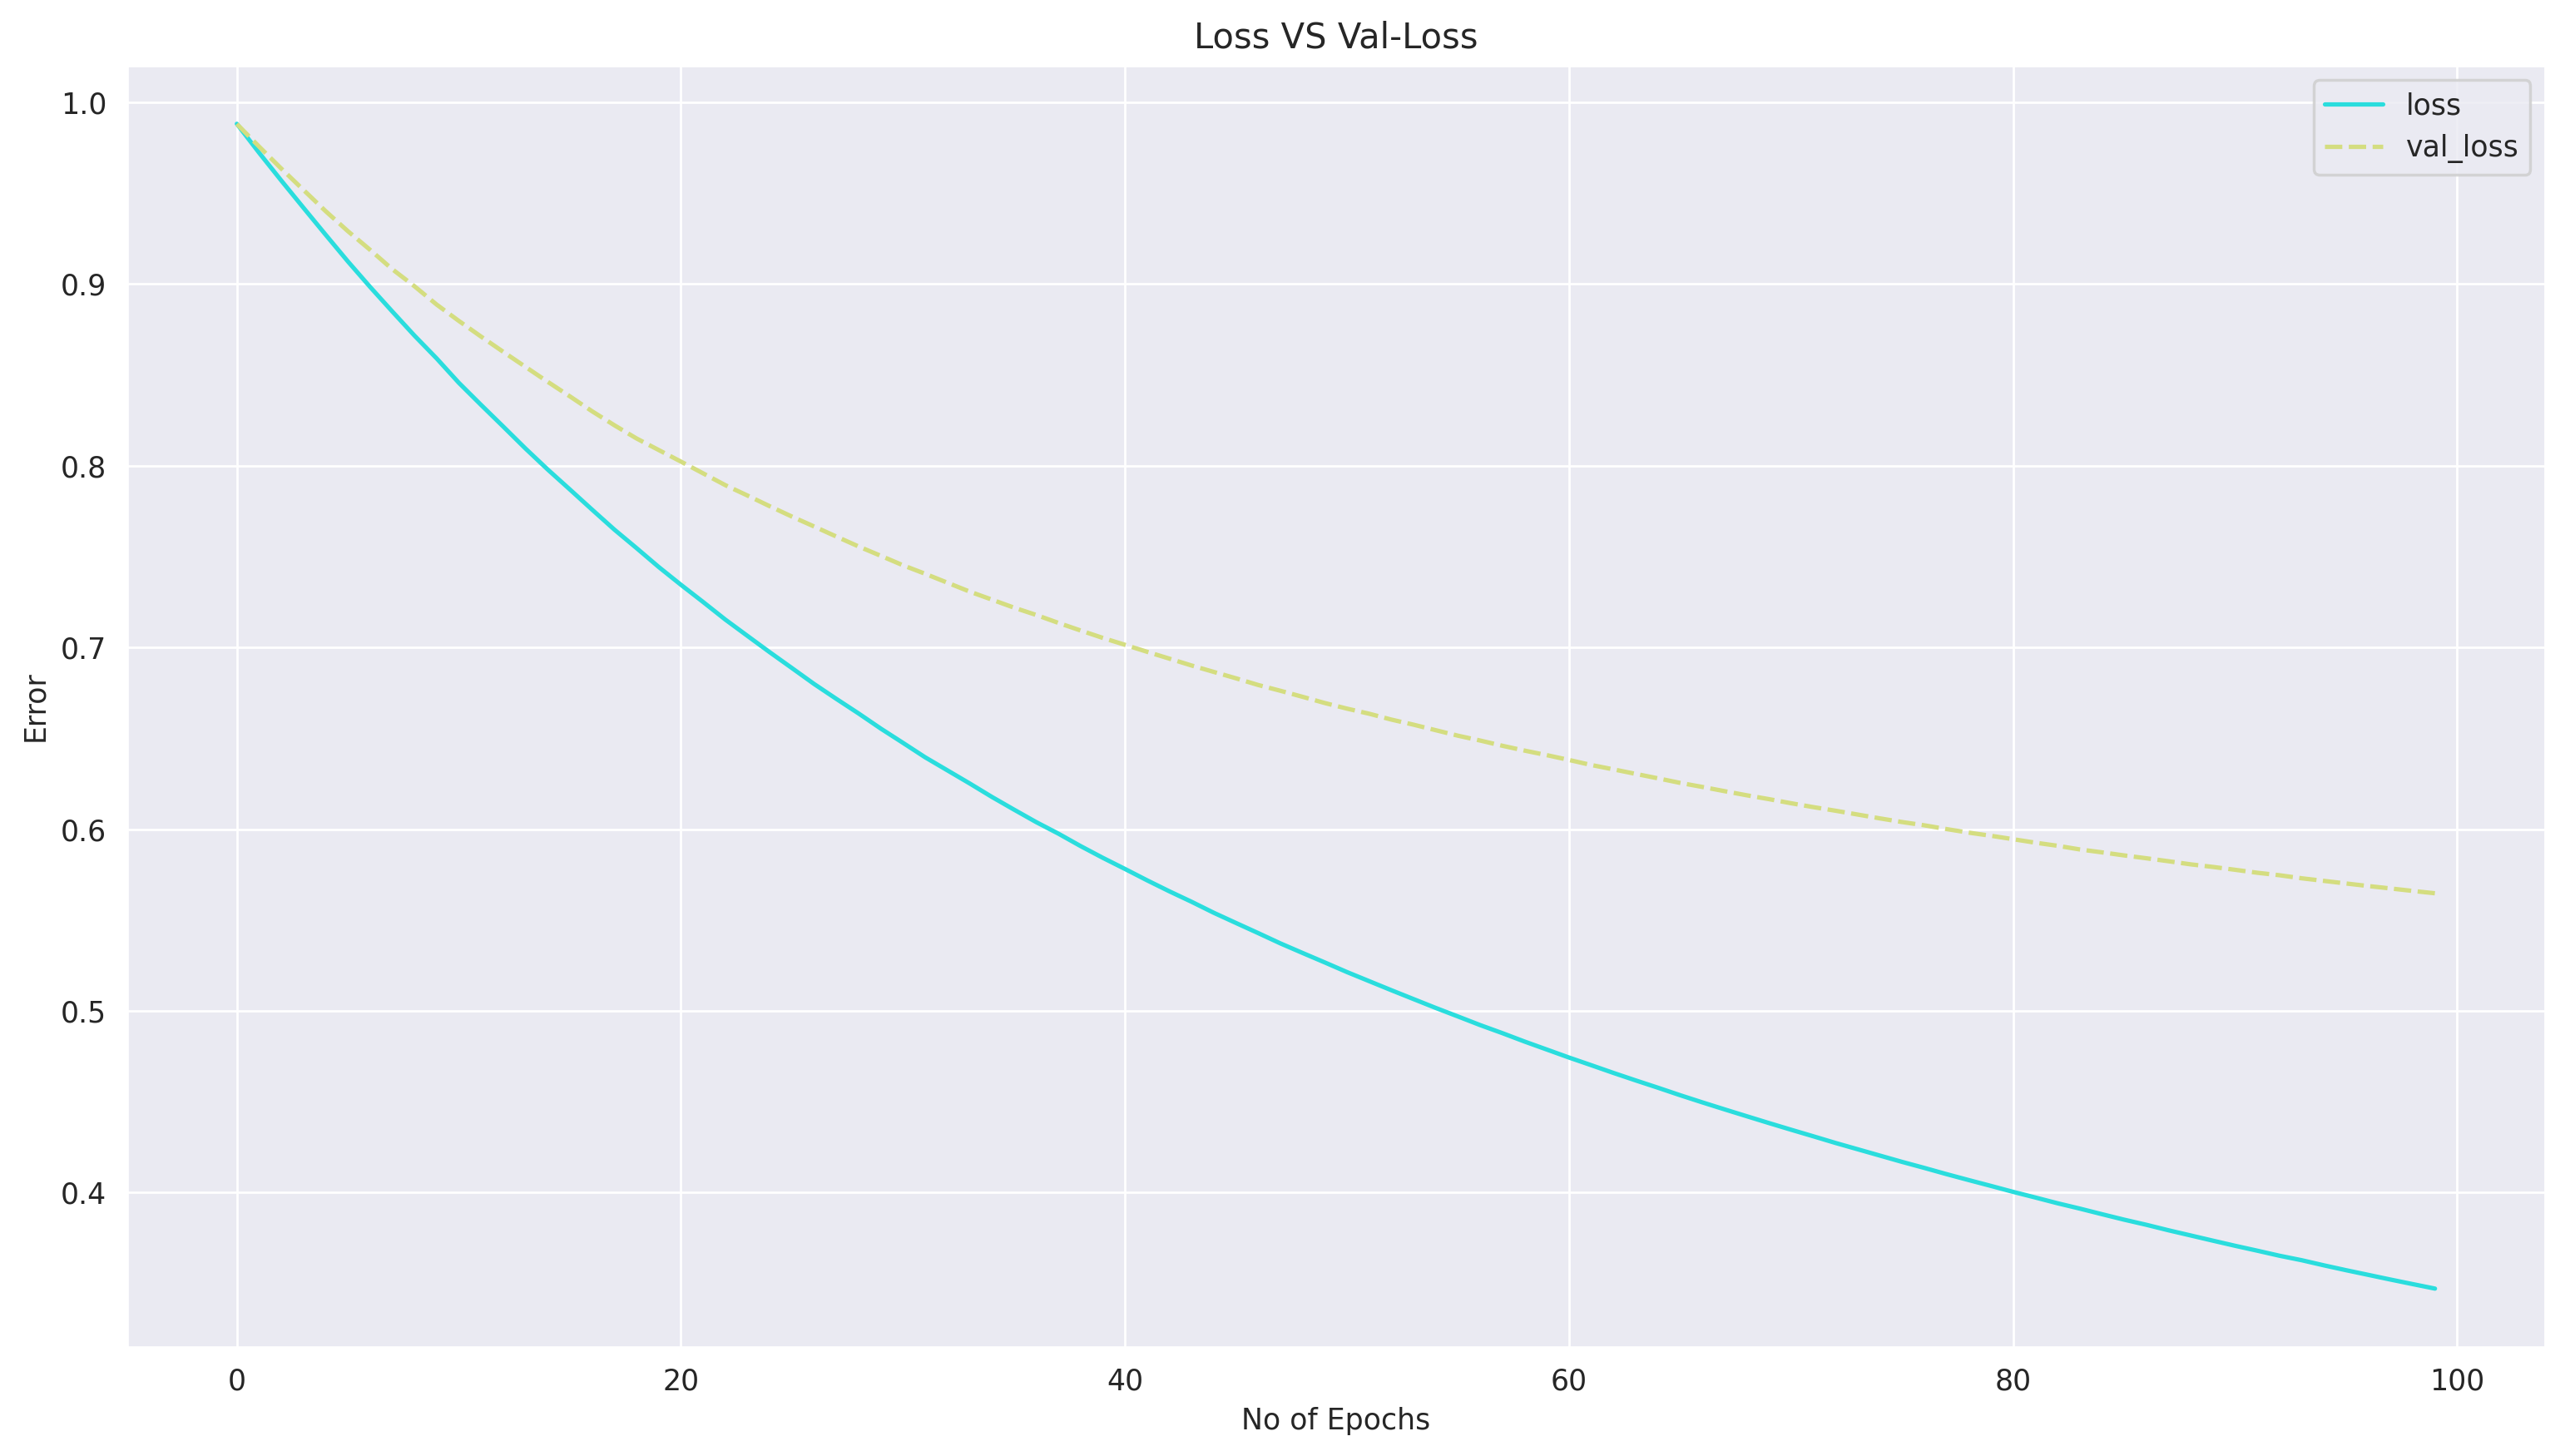

In [70]:
val_loss_es = pd.DataFrame(ann_es.history.history)

sns.lineplot(data = val_loss_es, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No of Epochs')

# Creating Classification Report

In [72]:
ypred_es = ann_es.predict(xtest)
ypred_es = ypred_es > 0.5

4/4 [==============================] - 0s 3ms/step


In [73]:
print(classification_report(ytest,ypred_es))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71        27
           1       0.89      0.98      0.93        87

    accuracy                           0.89       114
   macro avg       0.89      0.78      0.82       114
weighted avg       0.89      0.89      0.88       114



# Creating Model With Drop Out Layer
Creating ANN Model

In [74]:
ann_dol = Sequential()

# Creating Hidden Layer

In [76]:
ann_dol.add(Dense(units=30, activation='relu'))
ann_dol.add(Dropout(rate=0.5))

ann_dol.add(Dense(units=20, activation ='relu'))
ann_dol.add(Dropout(rate=0.5))

# Creating Output Layer

In [77]:
ann_dol.add(Dense(units=1, activation='sigmoid'))

# Connecting All Neurons In Each Layer

In [78]:
ann_dol.compile(optimizer='adam', loss='binary_crossentropy')

# Fitting Data

In [79]:
ann_dol.fit(xtrain,ytrain, validation_data = (xtest,ytest), epochs =50)

Epoch 1/50
11/11 [==============================] - 2s 42ms/step - loss: 0.7505 - val_loss: 0.6589
Epoch 2/50
11/11 [==============================] - 0s 10ms/step - loss: 0.7084 - val_loss: 0.6167
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6605 - val_loss: 0.5851
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6561 - val_loss: 0.5584
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6204 - val_loss: 0.5378
Epoch 6/50
11/11 [==============================] - 0s 9ms/step - loss: 0.5910 - val_loss: 0.5211
Epoch 7/50
11/11 [==============================] - 0s 10ms/step - loss: 0.5769 - val_loss: 0.5054
Epoch 8/50
11/11 [==============================] - 0s 11ms/step - loss: 0.5707 - val_loss: 0.4914
Epoch 9/50
11/11 [==============================] - 0s 7ms/step - loss: 0.5572 - val_loss: 0.4783
Epoch 10/50
11/11 [==============================] - 0s 8ms/step - loss: 0.5210 - val_loss: 0.4652
Epoch 11/50
11/

# Evaluating the Model

**Ploting Line-Plot**

Text(0.5, 0, 'No of Epochs')

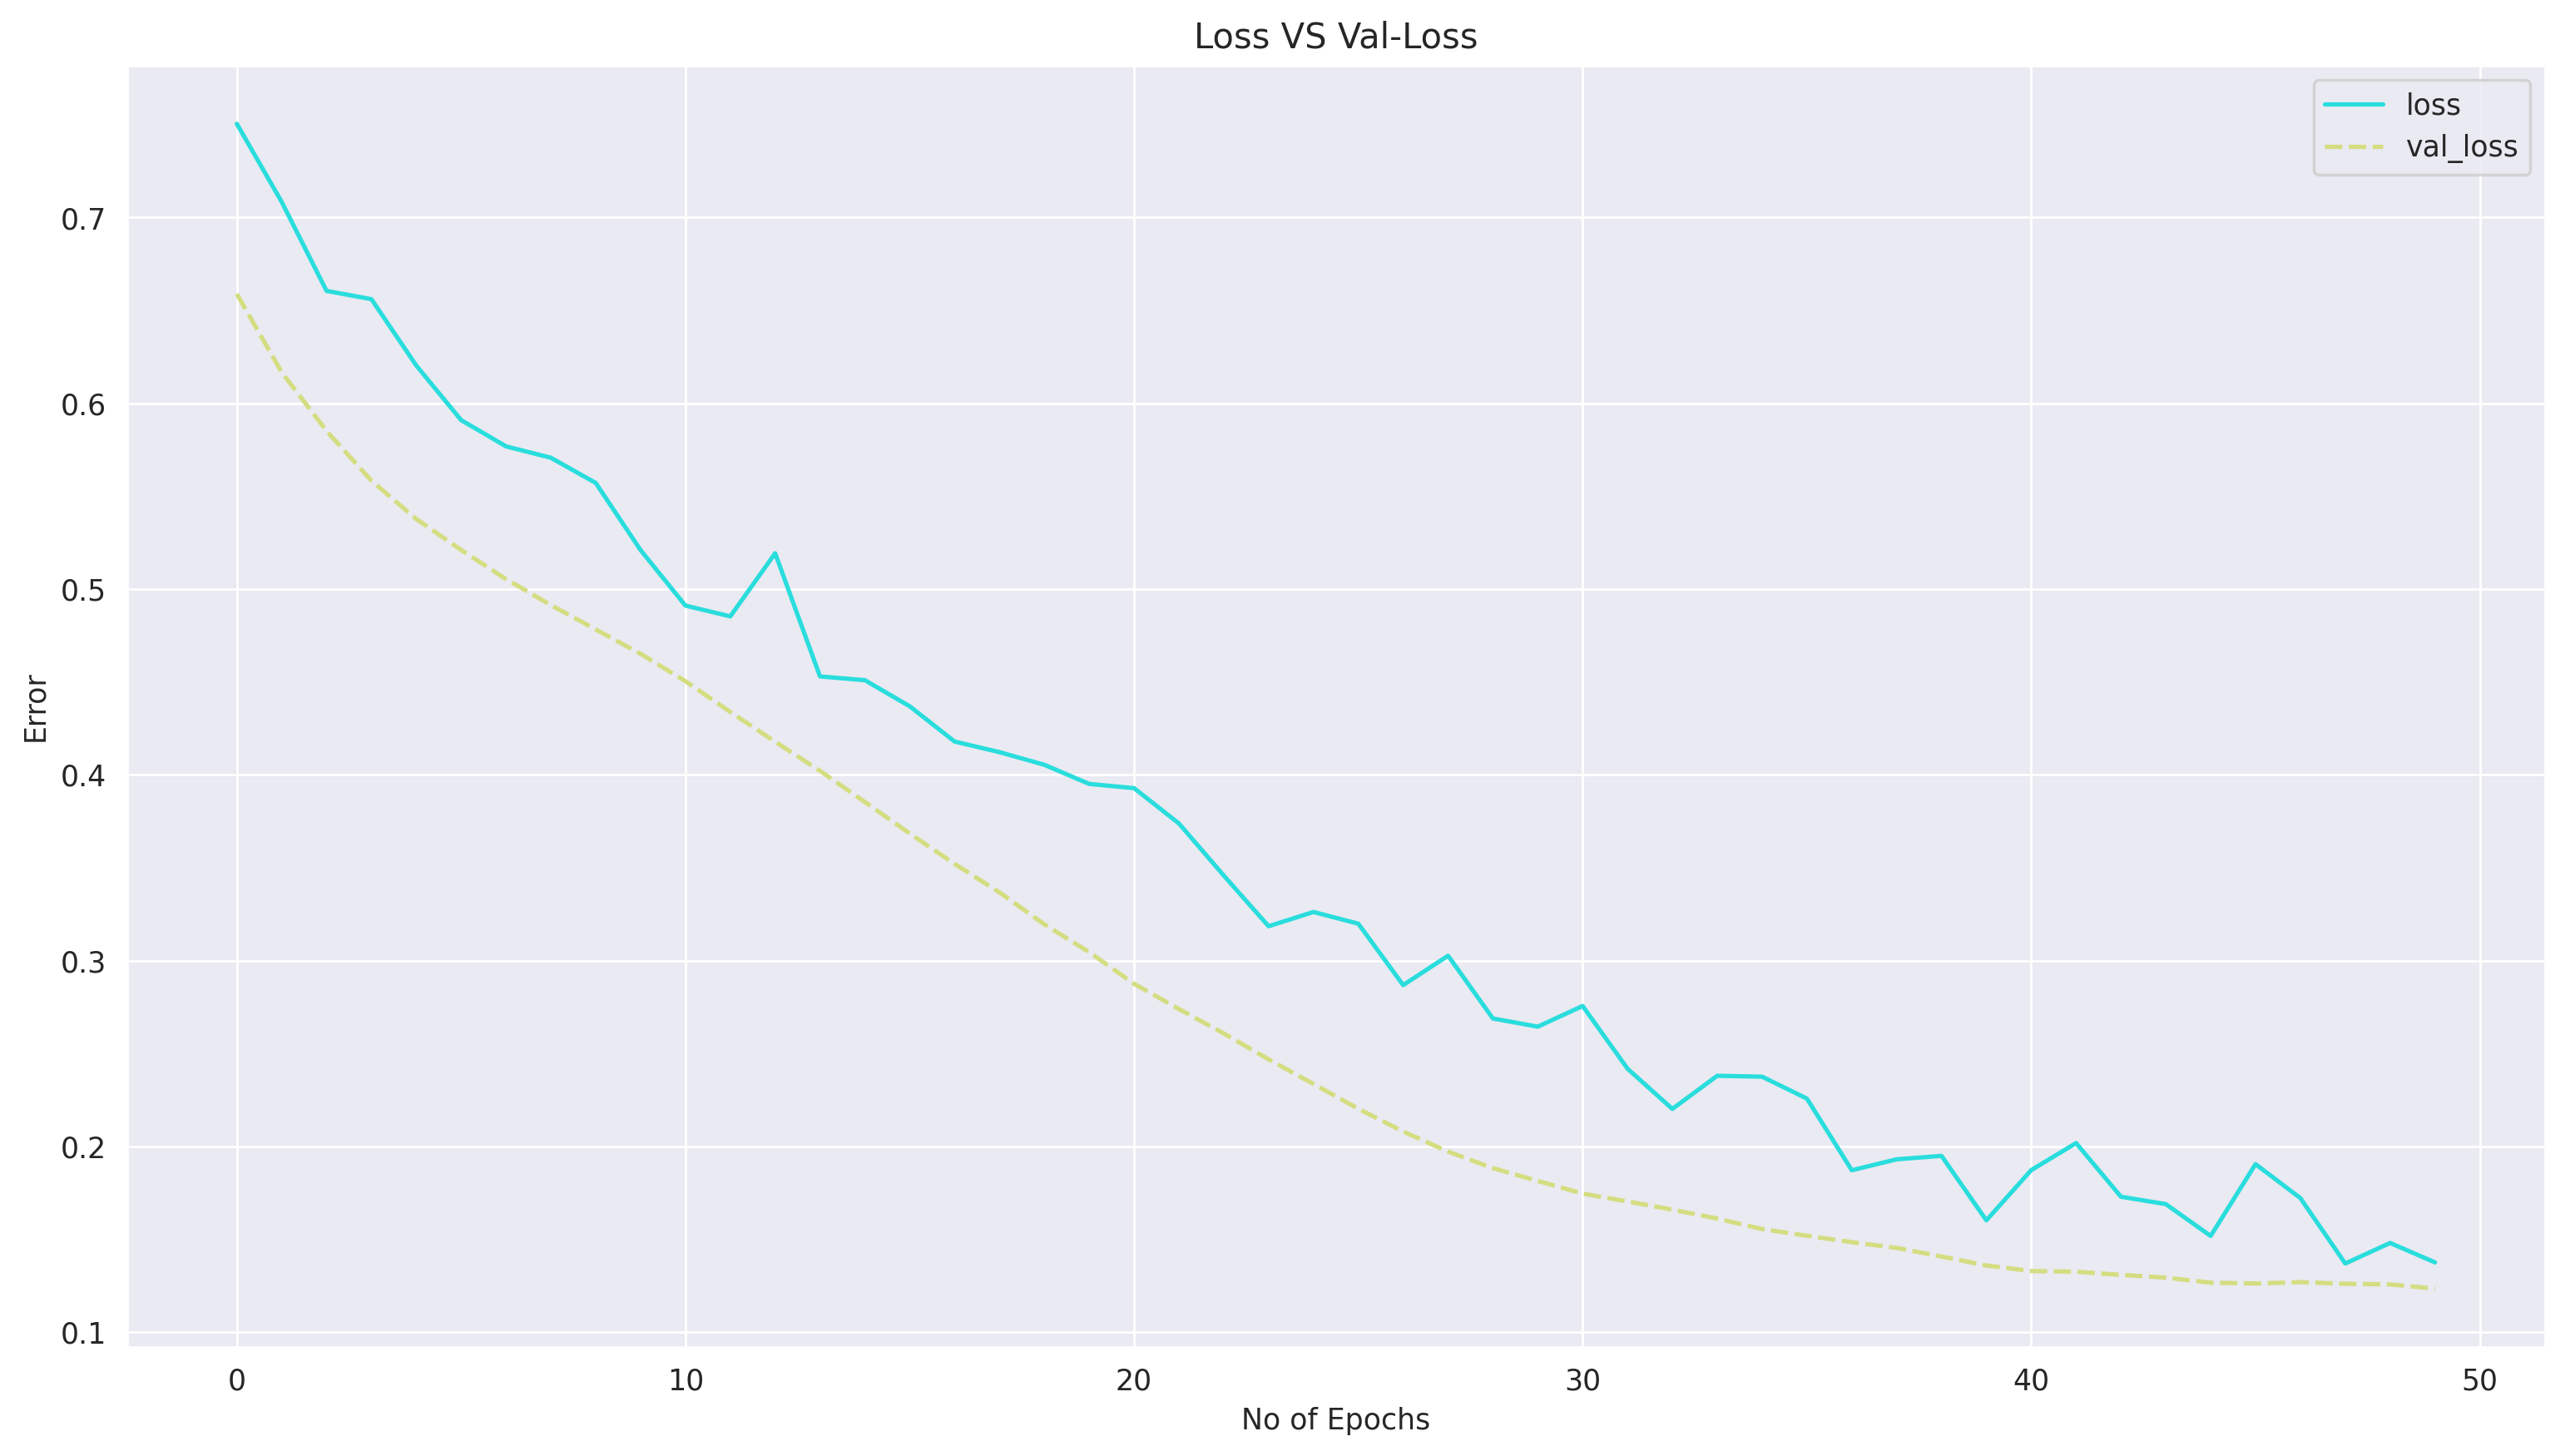

In [80]:
val_loss_dol = pd.DataFrame(ann_dol.history.history)

sns.lineplot(data = val_loss_dol, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No of Epochs')

# Creating Classification Report

In [81]:
ypred_dol = ann_dol.predict(xtest)
ypred_dol = ypred_dol > 0.5

4/4 [==============================] - 0s 3ms/step


In [82]:
print(classification_report(ytest,ypred_dol))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        27
           1       0.94      1.00      0.97        87

    accuracy                           0.95       114
   macro avg       0.97      0.89      0.92       114
weighted avg       0.95      0.95      0.94       114



# Creating Model With Early Stopping And Drop Out Layer
**Creating ann Model**

In [83]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [84]:
ann_all = Sequential()

# Creating Hidden Layer

In [85]:
ann_all.add(Dense(units=30, activation='relu'))
ann_all.add(Dropout(rate=0.5))

ann_all.add(Dense(units=20, activation='relu'))
ann_all.add(Dropout(rate=0.5))

# Creating Output Layer

In [86]:
ann_all.add(Dense(units=1, activation='sigmoid'))

# Connecting All Neurons In Each Layer


In [87]:
ann_all.compile(optimizer='adam', loss='binary_crossentropy')

Fitting Data

In [88]:
ann_all.fit(xtrain, ytrain, validation_data = (xtest, ytest), callbacks=[early] , epochs = 100)

Epoch 1/100
11/11 [==============================] - 1s 23ms/step - loss: 1.0873 - val_loss: 0.8260
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 1.0135 - val_loss: 0.7279
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.8646 - val_loss: 0.6630
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.7817 - val_loss: 0.6214
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7229 - val_loss: 0.5907
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6785 - val_loss: 0.5685
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6530 - val_loss: 0.5506
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6375 - val_loss: 0.5356
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6357 - val_loss: 0.5228
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6373 - val_loss: 0.5108
Epoch 11

# Evaluating The Model
**Ploting Line-Plot**

Text(0.5, 0, 'No Of Epochs')

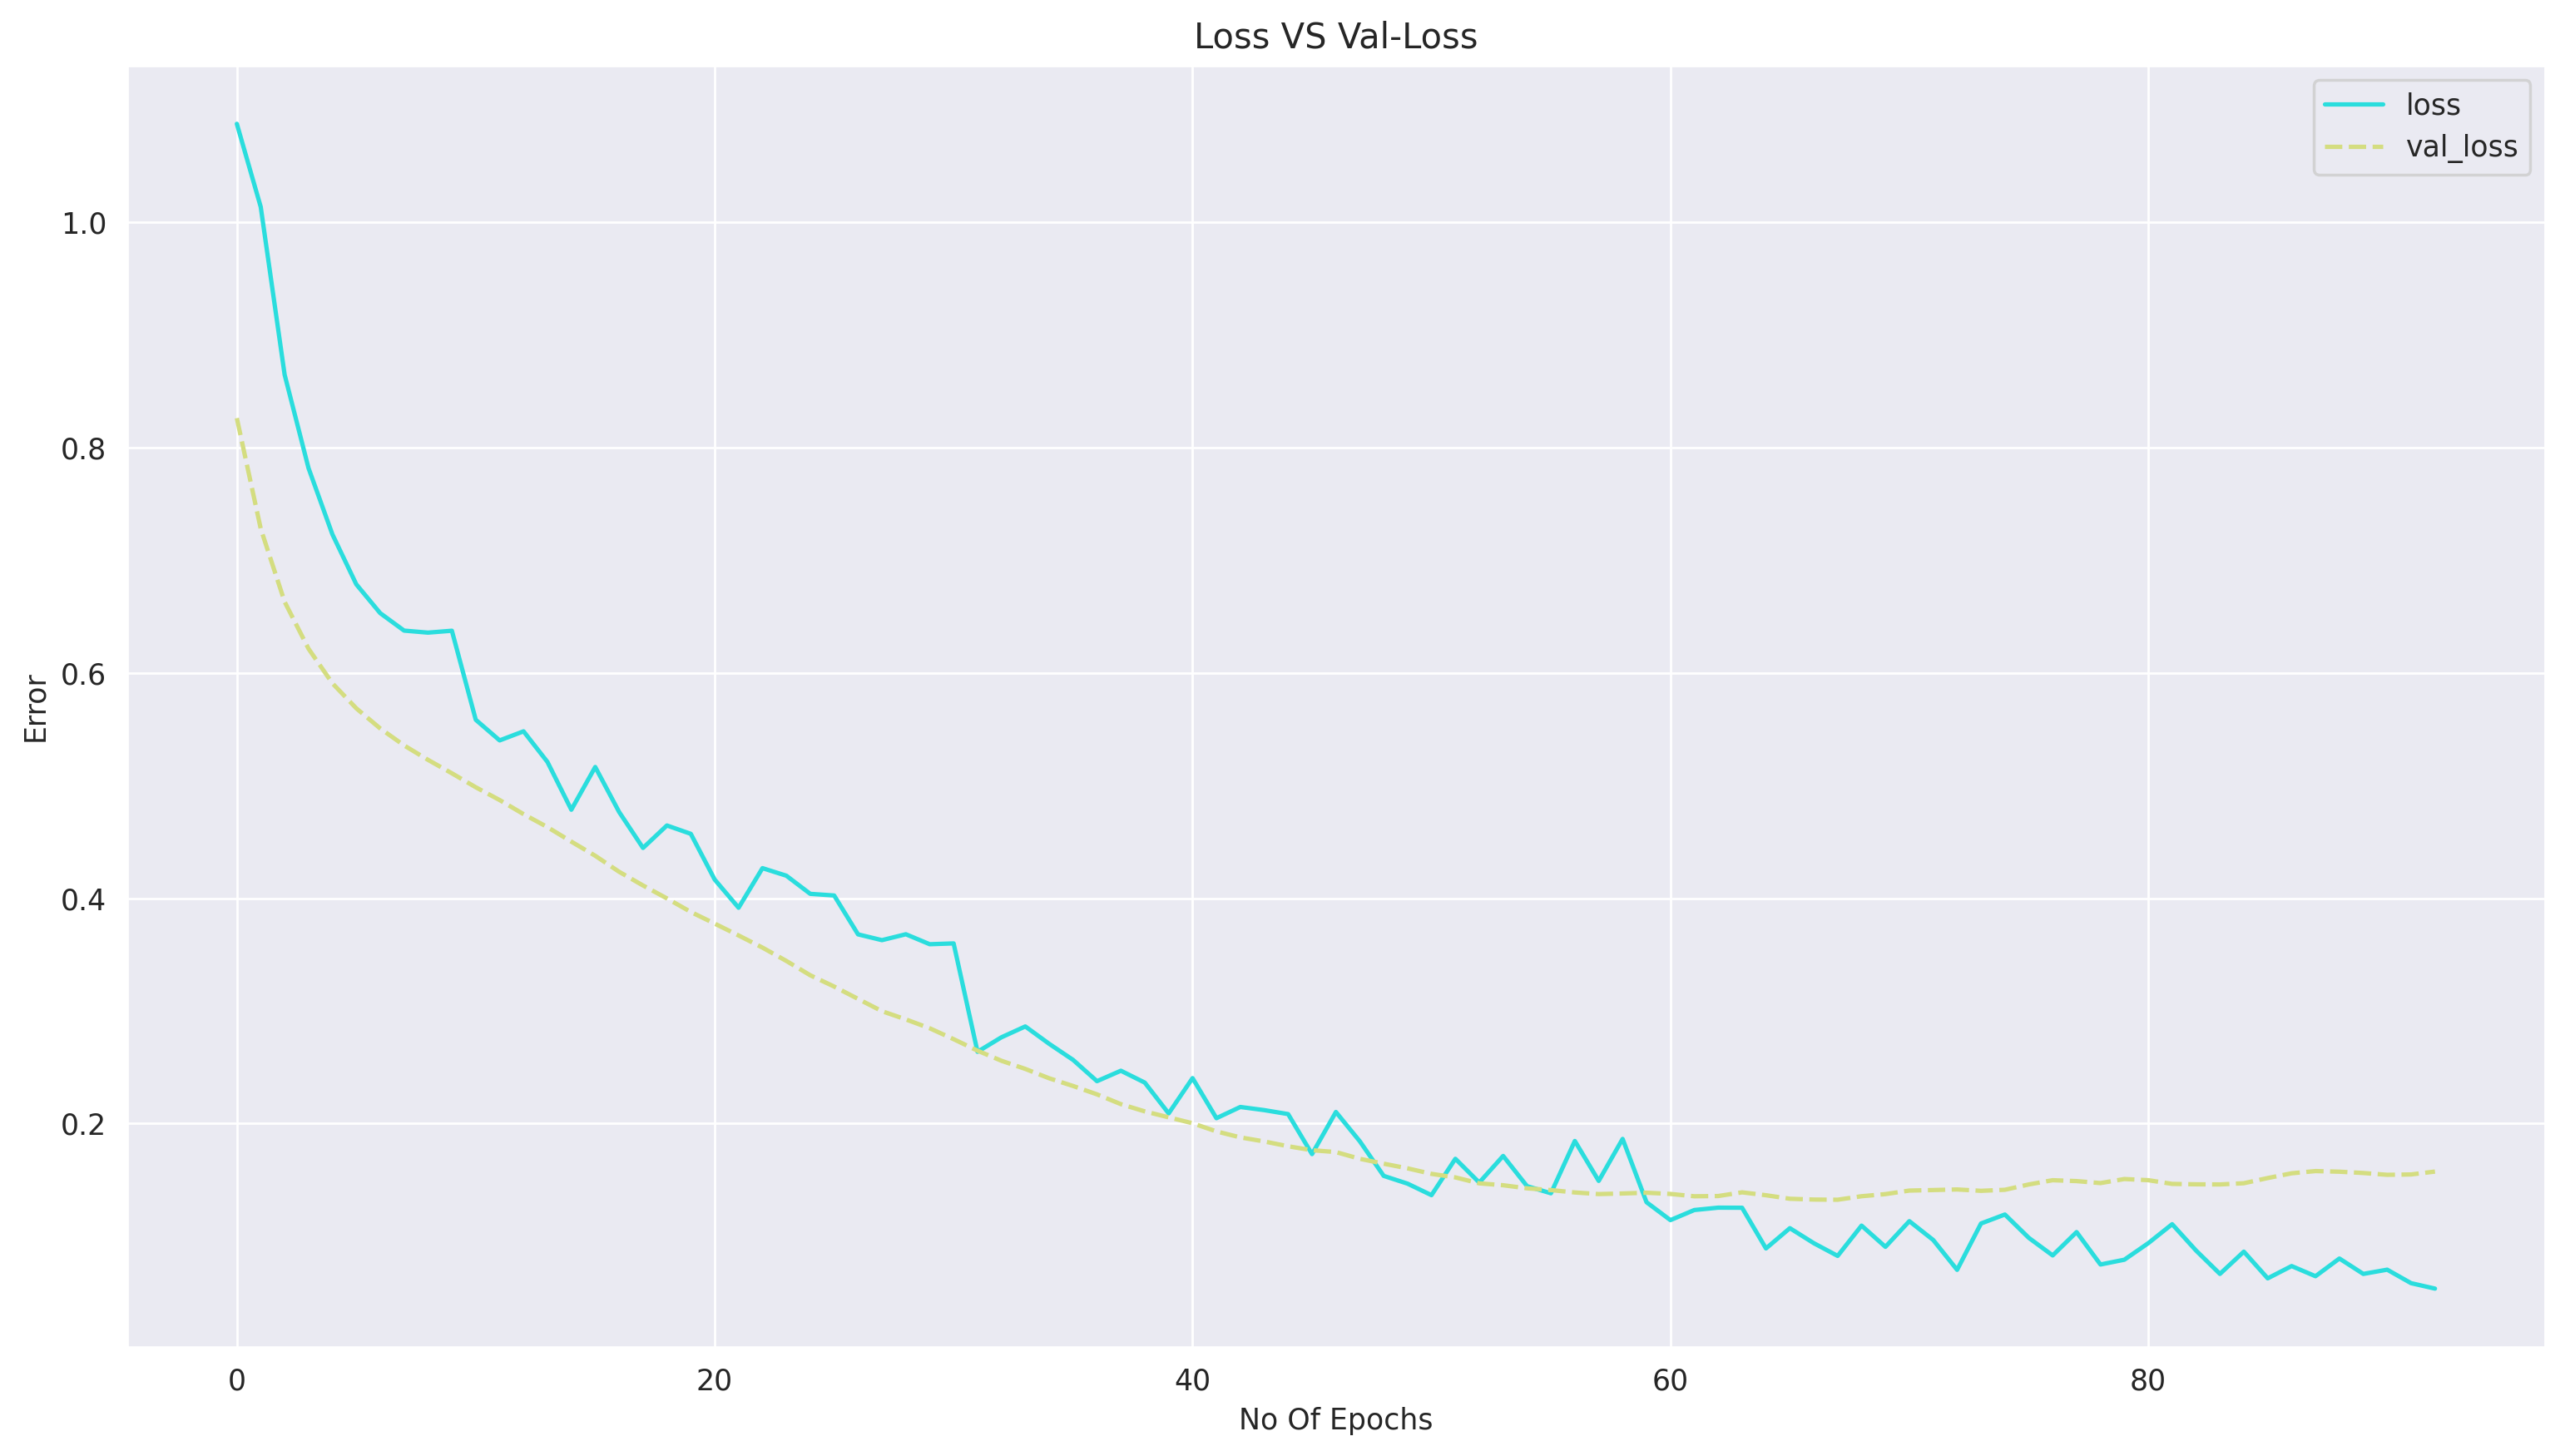

In [89]:
val_loss_all = pd.DataFrame(ann_all.history.history)

sns.lineplot(data = val_loss_all, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

Creating Classification Report

In [90]:
ypred_all = ann_all.predict(xtest)
ypred_all = ypred_all > 0.5


4/4 [==============================] - 0s 3ms/step


In [91]:
print(classification_report(ytest,ypred_all))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        27
           1       0.93      0.99      0.96        87

    accuracy                           0.94       114
   macro avg       0.94      0.88      0.91       114
weighted avg       0.94      0.94      0.94       114



Compairing All Model

<Axes: title={'center': 'Model With Early Stop And Drop Out Layer'}>

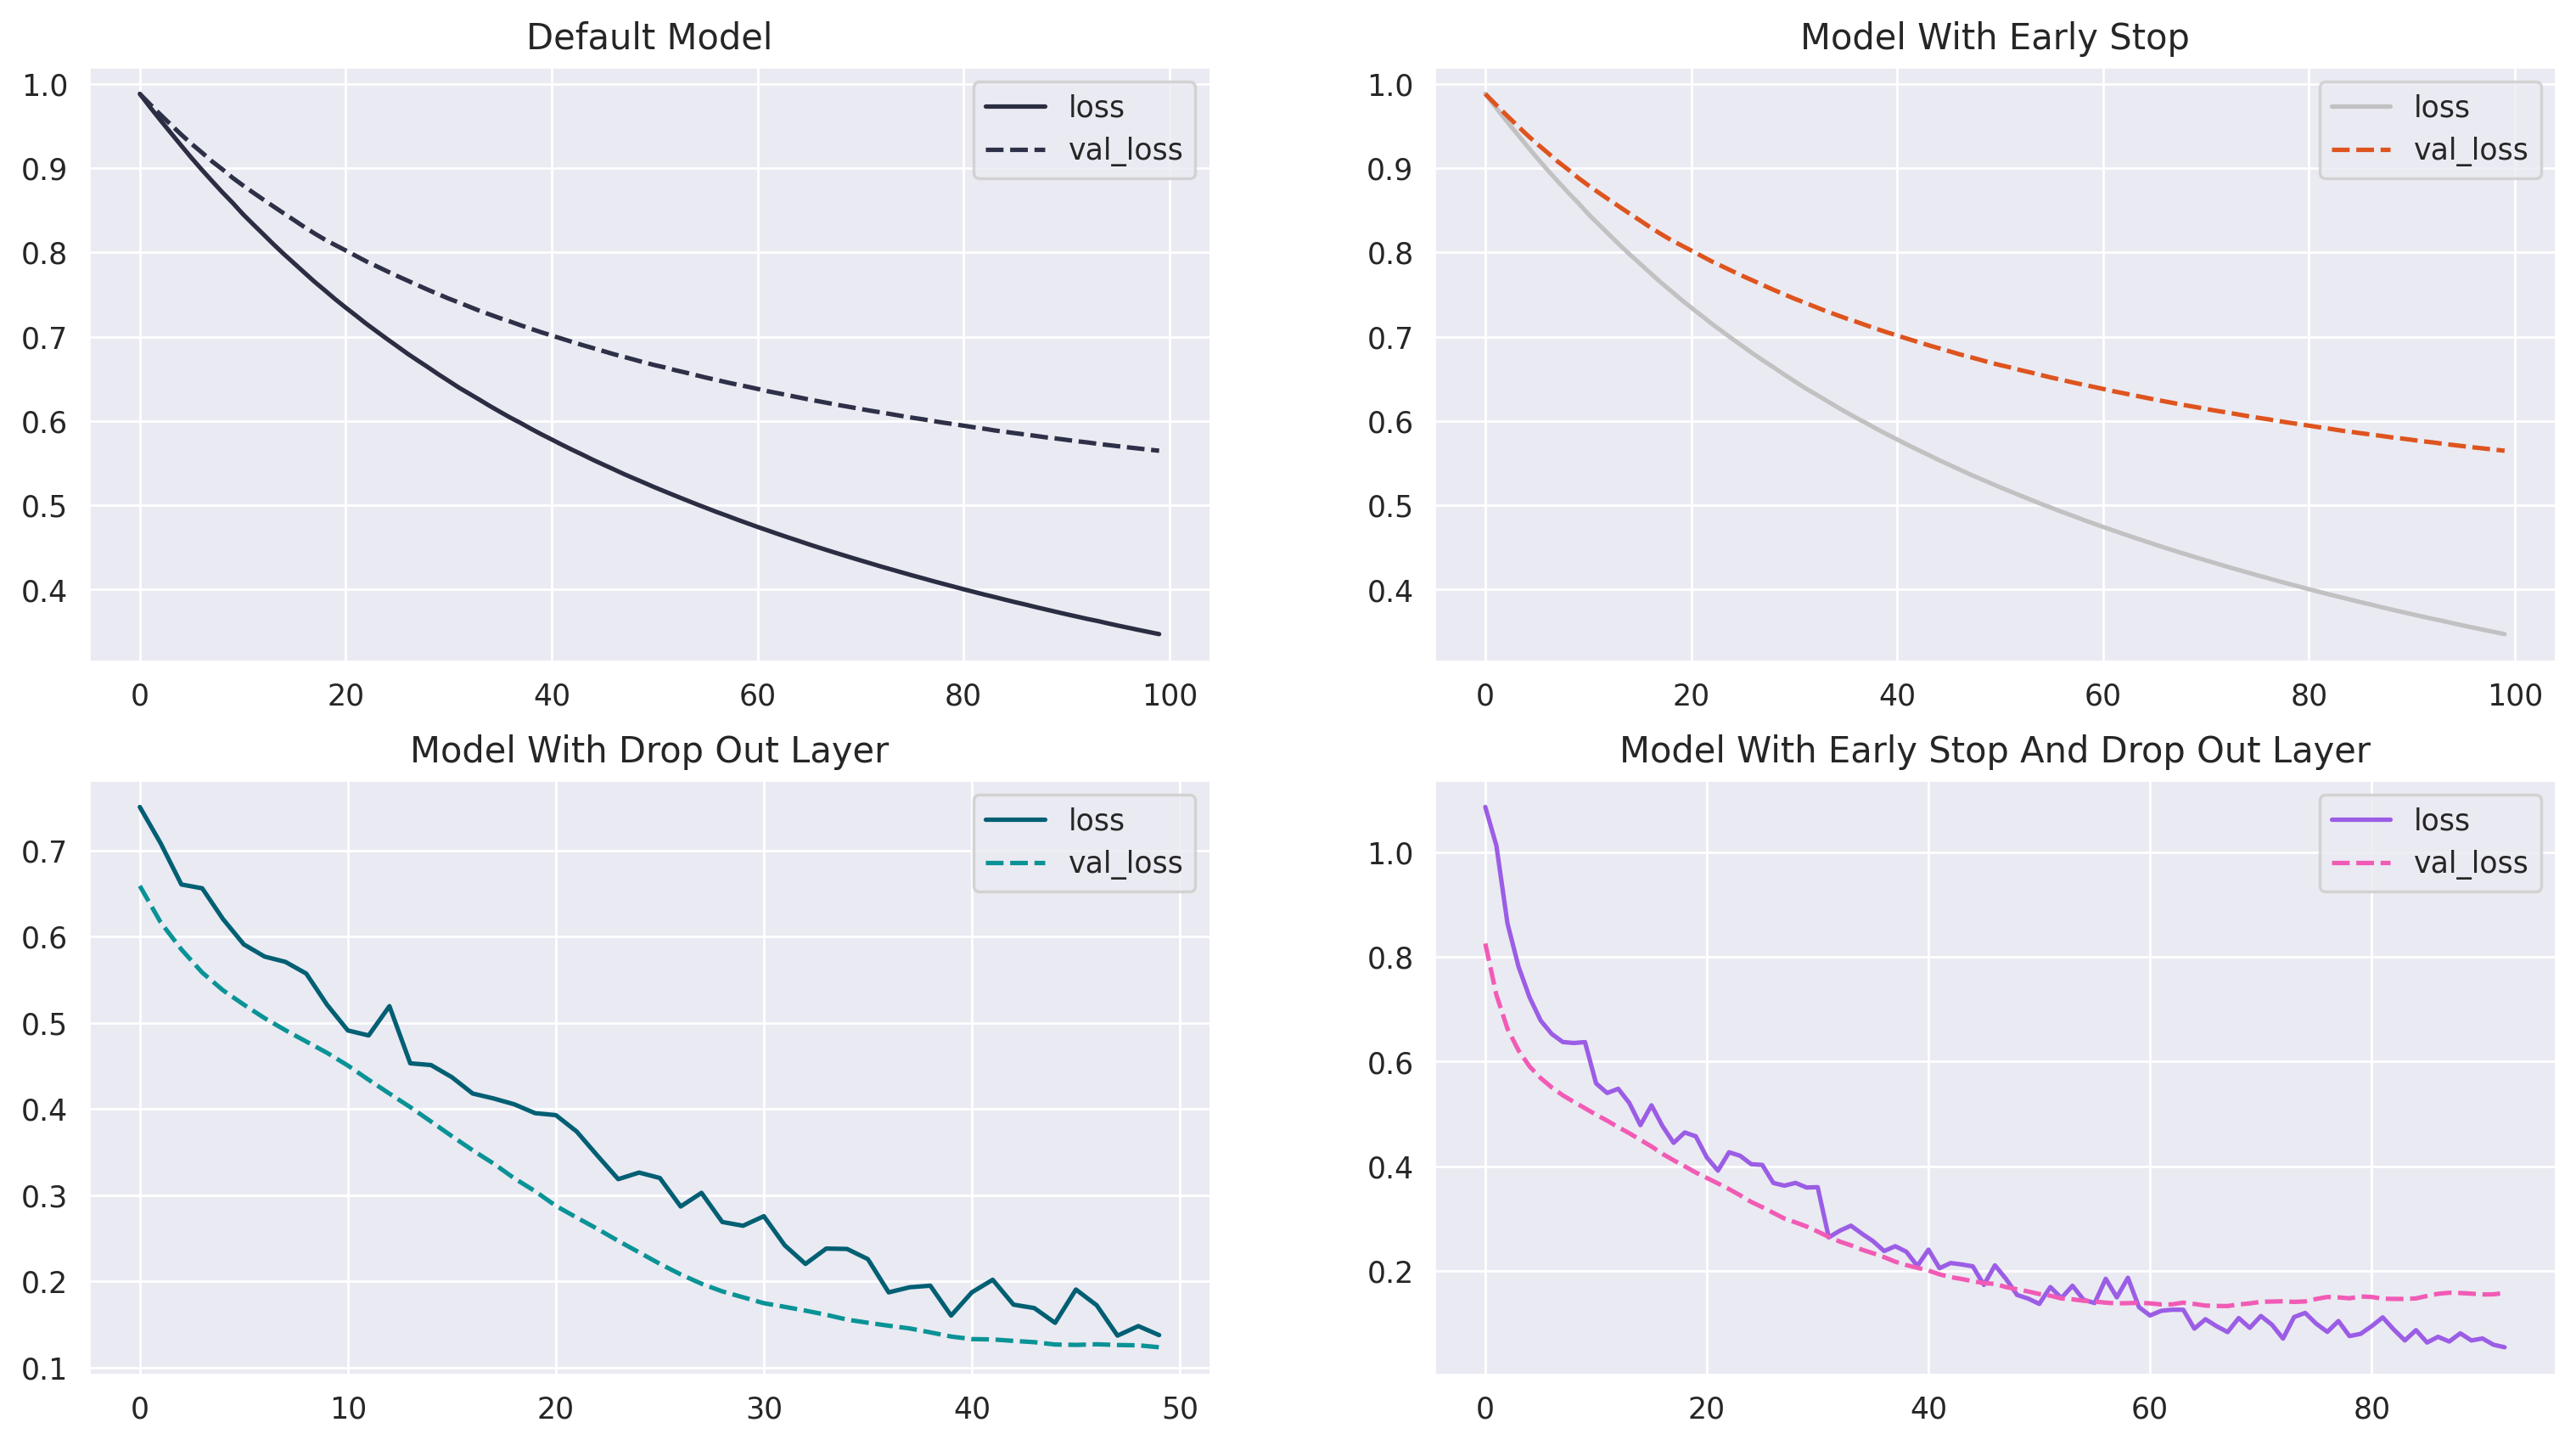

In [93]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].title.set_text('Default Model')
sns.lineplot(data=val_loss_def, ax = ax[0, 0], palette = ['#2b2d42', '#2d3047'])

ax[0, 1].title.set_text('Model With Early Stop')
sns.lineplot(data=val_loss_es, ax = ax[0, 1], palette = ['#c2c1c2', '#de541e'])

ax[1, 0].title.set_text('Model With Drop Out Layer')
sns.lineplot(data=val_loss_dol, ax = ax[1, 0], palette = ['#005f73', '#0a9396'])

ax[1, 1].title.set_text('Model With Early Stop And Drop Out Layer')
sns.lineplot(data=val_loss_all, ax = ax[1,1], palette =  [ '#9b5de5', '#f15bb5'])